### ay data need to be in the NetCDF before the debiasing the ACS chl
#### Note: this is based on the NASA HPLC xls file for AMT29

In [1]:
# this is to make the Jupyter notebook as wide as the screen (on the Mac at least)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format ='retina'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy import signal as sg
from datetime import datetime as dt

In [3]:
%matplotlib notebook

In [4]:
def prcrng(x):
    return (np.nanpercentile(x,84) - np.nanpercentile(x,16))/2.

In [5]:
DIN_hplc = "/data/datasets/cruise_data/active/AMT26/PML_optics/HPLC/"
DIN_acs = "/users/rsg/tjor/scratch_network/AMT_underway/AMT26/Processed/Underway/Step3/"

In [6]:
fn_hplc =  "AMT_26ESA_Pigments.xlsx"
fn_meta = "Filtering-Log-HPLC-AMT26.csv"
fn_optics = "amt26_final.nc"

In [7]:
print(DIN_hplc + fn_hplc)

df_hplc = pd.read_excel(DIN_hplc + fn_hplc, sheet_name = "BODC_submission_template", header = 16, engine = 'openpyxl', nrows=130)
df_hplc.keys()

#list(df_hplc['Sample name'])
df_hplc.rename(columns={'Sample name': 'Label'}, inplace = True)

df_hplc.keys()
print(df_hplc['Label'])
#acs_filtered2 = acs_filtered


# df_hplc

/data/datasets/cruise_data/active/AMT26/PML_optics/HPLC/AMT_26ESA_Pigments.xlsx
0              AMT26-UND-267-1500
1              AMT26-UND-268-0915
2              AMT26-UND-268-1218
3              AMT26-UND-269-0421
4              AMT26-UND-269-0953
                  ...            
123            AMT26-UND-306-0447
124            AMT26-UND-306-1328
125    AMT26-UND-306-1350-1Micron
126            AMT26-UND-307-1036
127    AMT26-UND-307-1057-1Micron
Name: Label, Length: 128, dtype: object


In [8]:

print(DIN_hplc + fn_meta)
df_meta = pd.read_csv(DIN_hplc + fn_meta, header = 0)
df_meta.keys()
list(df_meta['NAME'])
# df_meta

label = []; # match sample/name ID between meta and hplc file
for i in range(len(df_meta)):
    old_string = (str(df_meta['NAME'][i]))
    new_string = old_string.replace(":", "" )
    label.append(new_string)

df_meta['Label'] = label


print(df_meta['Label'])

/data/datasets/cruise_data/active/AMT26/PML_optics/HPLC/Filtering-Log-HPLC-AMT26.csv
0                       AMT26-UND-267-1500
1                             AMT26-001-5A
2                             AMT26-001-5B
3                            AMT26-001-23A
4                            AMT26-001-23B
                      ...                 
567             AMT26-UND-306-1350-1Micron
568    1/11/16 AMT26 UND 1350 BOB 1 MICRON
569                     AMT26-UND-307-1036
570             AMT26-UND-307-1057-1Micron
571    2/11/16 AMT26 UND 1057 BOB 1 MICRON
Name: Label, Length: 572, dtype: object


In [9]:
# merge two tables to extract info from df_meta

print(df_hplc['Label'])
print(df_meta['Label'])

df_hplc = pd.merge(df_hplc, df_meta, on=['Label'])

sorted(df_hplc.keys())

0              AMT26-UND-267-1500
1              AMT26-UND-268-0915
2              AMT26-UND-268-1218
3              AMT26-UND-269-0421
4              AMT26-UND-269-0953
                  ...            
123            AMT26-UND-306-0447
124            AMT26-UND-306-1328
125    AMT26-UND-306-1350-1Micron
126            AMT26-UND-307-1036
127    AMT26-UND-307-1057-1Micron
Name: Label, Length: 128, dtype: object
0                       AMT26-UND-267-1500
1                             AMT26-001-5A
2                             AMT26-001-5B
3                            AMT26-001-23A
4                            AMT26-001-23B
                      ...                 
567             AMT26-UND-306-1350-1Micron
568    1/11/16 AMT26 UND 1350 BOB 1 MICRON
569                     AMT26-UND-307-1036
570             AMT26-UND-307-1057-1Micron
571    2/11/16 AMT26 UND 1057 BOB 1 MICRON
Name: Label, Length: 572, dtype: object


[' [Chl c2MGDG-1]',
 ' [Chl c2MGDG-2]',
 '#SDY',
 '1 micron (M) or not (N)',
 'BOTTLE NO',
 'CRYOBOX HPLC',
 'CTD',
 'Cruise Name',
 'Depth (meters)',
 'Filter diameter (mm)',
 'Filter storage before analysis',
 'Filter type',
 'LAT',
 'LON',
 'Label',
 'N = Underway, S = Surface; D = DCM',
 'NAME',
 'NOTES',
 'Name of Water Body',
 'REPLICATE (A = NO, B = YES)',
 'SAMPLE DETPH (m)',
 'STATION',
 'Sample Collector',
 'TIME (GMT)',
 'Unnamed: 5',
 'VARIABLE',
 'VOLUME (l)',
 'Volume filtered (L)',
 '[Allo]',
 '[Anth]',
 '[Asta]',
 '[But fuco]',
 '[Caro]',
 '[Chl a]',
 '[Chl b] + [DVChl b]',
 '[Chl c1]',
 '[Chl c2]',
 '[Chl-c3]',
 '[Chlide a]',
 '[DVChl a]',
 '[Diad]',
 '[Diato]',
 '[Fuco]',
 '[Hex fuco]',
 '[Lut]',
 '[MgDVP]',
 '[Neo]',
 '[PPC]',
 '[PPC]/[Tpig]',
 '[PSC]',
 '[PSP]',
 '[PSP]/[TPig]',
 '[Perid]',
 '[Pras]',
 '[TAcc]',
 '[TAcc]/[Tchla]',
 '[TChl a]',
 '[TChl a]/[TPig]',
 '[TChl b]',
 '[TChl c]',
 '[TChl]',
 '[TPig]',
 '[Viola]',
 '[Zea]',
 '[ββ-Car]',
 '[βε-Car]',
 'blank 

In [10]:
# convert PML pigment names to NASA pigment names for submission
#                            PML  :  NASA


pml2nasa = {            
                          "[Allo]":"Allo",
                          "[Asta]": "Asta",
                          "[Anth]": "PML_only_Anth",
                      "[But fuco]":"But-fuco",
                          "[Caro]":"Alpha-beta-Car", # !!!! TO CHECK !!!
                         "[Chl a]":'Chl_a',
             "[Chl b] + [DVChl b]":"PML_only_Chl_b_DVChl_b",
                        '[Chl c1]':'Chl_c1',
                        '[Chl c2]':'Chl_c2',
                        '[Chl-c3]':'Chl_c3',
                      "[Chlide a]":"Chlide_a",
                          "[Diad]":"Diadino",
                         "[Diato]":"Diato",
                       "[DVChl a]":"DV_Chl_a",
                          "[Fuco]":"Fuco",
                      "[Hex fuco]":"Hex-fuco",
                           "[Lut]":"Lut",
                         '[MgDVP]':'Mg_DVP',
                           '[Neo]':'Neo',
                           "[PPC]":"PPC",
                           "[PSC]":"PSC",
                           "[PSP]":"PSP",
                         "[Perid]":"Perid",
                          "[Pras]":"Pras",
                           "[Zea]":"Zea",
                          "[TAcc]":"Tacc",
                          "[TChl]":"TChl",
                        "[TChl a]":"Tot_Chl_a",
                        "[TChl b]":"Tot_Chl_b",
                        "[TChl c]":"Tot_Chl_c",
                          '[TPig]': "Tpg",
                         '[Viola]':'Viola',
                        '[ββ-Car]':"beta-beta-Car",
                        '[βε-Car]':"beta-epi-Car",                  
            
           }
#                     "a-carotene":"Alpha-beta-Car", # these two successive pigments need to be merged (see below)
#                     "b-carotene":"Alpha-beta-Car"}

# rename DHI columns with NASA names
df_hplc = df_hplc.rename(columns = pml2nasa)

# create merged pigments
# "Alpha-beta-Car", 
#df_hplc["Alpha-beta-Car"] = df_hplc["a-carotene"] + df_hplc["b-carotene"] - ALREADY IN MERGED FORMAT
#df_hplc = df_hplc.drop(columns=["a-carotene", "b-carotene"]) - 
           
# "Chl c1c2"
df_hplc["Chl_c1c2"] = df_hplc["Chl_c2"] + df_hplc["Chl_c1"]  +df_hplc["Mg_DVP"]


# "Tot_Chl_a" = DV_Chl_a + MV_Chl_a + Chlide_a (+ Chl_a allomers + Chl_a epimers)   - ALREADY IN MERGED FORMAT
#df_hplc["Tot_Chl_a"] = df_hplc["DV_Chl_a"] + df_hplc["MV_Chl_a"] + df_hplc["Chlide_a"]

# "Tot_Chl_c" = Tot_Chl_a + Tot_Chl_b + Tot_Chl_c - ALREADY IN MERGED FORMAT
#df_hplc["Tot_Chl_c"] = df_hplc["Chl_c3"] + df_hplc["Chl_c1c2"]

# "Tchl" = Tot_Chl_a + Tot_Chl_b + Tot_Chl_c - ALREADY IN MERGED FORMAT
#df_hplc["Tchl"] = df_hplc["Tot_Chl_a"] + df_hplc["Tot_Chl_b"] + df_hplc["Tot_Chl_c"]

# "PPC" (photoprotective carotenoids) = allo + diadino + diato + zea + alpha-beta-car)
#f_hplc["PPC"] = df_hplc["Allo"] + df_hplc["Diadino"] + df_hplc["Diato"] + df_hplc["Zea"] + df_hplc["Alpha-beta-Car"]

# "PSC" (photosynthetic carotenoids) = but-fuco + fuco + hex-fuco + perid
#df_hplc["PSC"] = df_hplc["But-fuco"] + df_hplc["Fuco"] + df_hplc["Hex-fuco"] + df_hplc["Perid"] 

# "PSP" (phosynthetic pigments) = PSC + TChl
#df_hplc["PSP"] = df_hplc["PSC"] + df_hplc["Tchl"] 

# "Tcar" (total carotenoids) = PPC + PSC
df_hplc["Tcar"] = df_hplc["PPC"] + df_hplc["PSC"] 

# "Tacc" (total accessory pigments) = PPC + PSC + Tot_Chl_b + Tot_Chl_c  - ALREADY IN MERGED FORMAT
#df_hplc["Tacc"] = df_hplc["PPC"] + df_hplc["PSC"] + df_hplc["Tot_Chl_b"] + df_hplc["Tot_Chl_c"] 

# "Tpg" (total pigments) = TAcc + Tot_Chl_a - ALREADY IN MERGED FORMAT
#df_hplc["Tpg"] = df_hplc["Tacc"] + df_hplc["Tot_Chl_a"] 

# "DP" (total diagnostic pigments) = PSC + allo + zea + Tot_Chl_b
df_hplc["DP"] = df_hplc["PSC"] + df_hplc["Allo"] + df_hplc["Zea"] + df_hplc["Tot_Chl_b"]


# new dictionary with additional pigments
derived_pigs = {#"Alpha-beta-Car":"Alpha-beta-Car",
                "Chl_c1c2":"Chl_c1c2",
               # "Tot_Chl_a":"Tot_Chl_a", - already added
               # "Tot_Chl_c":"Tot_Chl_c",
                #"Tchl":"Tchl",
                #"PPC":"PPC",
                #"PSC":"PSC",
                #"PSP":"PSP",
                "Tcar":"Tcar",
                "DP":"DP"      }


# drop pigment ratios 

df_hplc.keys()



Index(['Label', 'Sample Collector', 'Cruise Name', 'Volume filtered (L)',
       'Name of Water Body', 'Unnamed: 5', 'Depth (meters)',
       'Filter storage before analysis', 'Filter type', 'Filter diameter (mm)',
       'Tot_Chl_a', 'Tot_Chl_b', 'Tot_Chl_c', 'Alpha-beta-Car', 'Allo',
       'But-fuco', 'Diadino', 'Diato', 'Fuco', 'Hex-fuco', 'Perid', 'Zea',
       'Chl_a', 'DV_Chl_a', 'Chlide_a', 'Mg_DVP', ' [Chl c2MGDG-1]',
       ' [Chl c2MGDG-2]', 'PML_only_Chl_b_DVChl_b', 'Chl_c1', 'Chl_c2',
       'Chl_c3', 'beta-epi-Car', 'beta-beta-Car', 'Lut', 'Neo', 'Viola',
       'Pras', 'PML_only_Anth', 'Asta', 'blank intentionally', 'TChl', 'PPC',
       'PSC', 'PSP', 'Tacc', 'Tpg', '[TAcc]/[Tchla]', '[PPC]/[Tpig]',
       '[PSP]/[TPig]', '[TChl a]/[TPig]', '#SDY', 'STATION', 'CTD',
       'BOTTLE NO', 'SAMPLE DETPH (m)', 'TIME (GMT)', 'LAT', 'LON', 'VARIABLE',
       'VOLUME (l)', 'REPLICATE (A = NO, B = YES)', 'NAME', 'CRYOBOX HPLC',
       'N = Underway, S = Surface; D = DCM', '1 micr

In [11]:
# drop pigment ratios 
#df_hplc = df_hplc.drop('void1') # redumdant
#df_hplc = df_hplc.drop('[PPC]/[Tpig]') # redumdant
#df_hplc = df_hplc.drop('[PSP]/[TPig]') # redumdant
#df_hplc = df_hplc.drop('[TChl a]/[TPig]') # redumdant

#df_hplc['[TAcc]/[Tchla]'] =[]

In [12]:
# merge dictonaries with names of all pigments
all_pigs = dict(pml2nasa, **derived_pigs)

print(all_pigs)

{'[Allo]': 'Allo', '[Asta]': 'Asta', '[Anth]': 'PML_only_Anth', '[But fuco]': 'But-fuco', '[Caro]': 'Alpha-beta-Car', '[Chl a]': 'Chl_a', '[Chl b] + [DVChl b]': 'PML_only_Chl_b_DVChl_b', '[Chl c1]': 'Chl_c1', '[Chl c2]': 'Chl_c2', '[Chl-c3]': 'Chl_c3', '[Chlide a]': 'Chlide_a', '[Diad]': 'Diadino', '[Diato]': 'Diato', '[DVChl a]': 'DV_Chl_a', '[Fuco]': 'Fuco', '[Hex fuco]': 'Hex-fuco', '[Lut]': 'Lut', '[MgDVP]': 'Mg_DVP', '[Neo]': 'Neo', '[PPC]': 'PPC', '[PSC]': 'PSC', '[PSP]': 'PSP', '[Perid]': 'Perid', '[Pras]': 'Pras', '[Zea]': 'Zea', '[TAcc]': 'Tacc', '[TChl]': 'TChl', '[TChl a]': 'Tot_Chl_a', '[TChl b]': 'Tot_Chl_b', '[TChl c]': 'Tot_Chl_c', '[TPig]': 'Tpg', '[Viola]': 'Viola', '[ββ-Car]': 'beta-beta-Car', '[βε-Car]': 'beta-epi-Car', 'Chl_c1c2': 'Chl_c1c2', 'Tcar': 'Tcar', 'DP': 'DP'}


In [13]:
# find matching keys and merge them into a single one
for key in df_hplc.keys():
    if "_x" in key:
        print(key)
        if ~(np.all(df_hplc[key] == df_hplc[key[:-1]+"y"])):
            print([key, " not matching"])
        else:
            # drop *_x key
            print(["droppping " + key ])
            df_hplc = df_hplc.drop(columns = [key])
            # rename *_y key
            print(["renaming " + key ])
            df_hplc = df_hplc.rename(columns = {key[:-1]+"y" : key[:-2]})
            

In [14]:
# convert date (numpy.datetime64) and time (datetime.time) to a single datetime object
from datetime import datetime as dt

date = [dt.strptime('16' + str(df_hplc['#SDY'][i]), '%y%j').date() for i in range(len(df_hplc))]
time_inday =  [dt.strptime(str(df_hplc['TIME (GMT)'][i]), '%H:%M:%S').time() for i in range(len(df_hplc))]

# add Time object to Date object to get DateTime object
time = [dt.combine(date[i],time_inday[i]) for i in range(len(df_hplc))]

# create "Time" key in df_hplc
df_hplc['time'] = time

# drop Date and Time
df_hplc = df_hplc.drop(columns = ["#SDY", "TIME (GMT)"])
                       
df_hplc = df_hplc.sort_values(by = ['time'])
df_hplc = df_hplc.reset_index(drop = True)

df_hplc.keys()

Index(['Label', 'Sample Collector', 'Cruise Name', 'Volume filtered (L)',
       'Name of Water Body', 'Unnamed: 5', 'Depth (meters)',
       'Filter storage before analysis', 'Filter type', 'Filter diameter (mm)',
       'Tot_Chl_a', 'Tot_Chl_b', 'Tot_Chl_c', 'Alpha-beta-Car', 'Allo',
       'But-fuco', 'Diadino', 'Diato', 'Fuco', 'Hex-fuco', 'Perid', 'Zea',
       'Chl_a', 'DV_Chl_a', 'Chlide_a', 'Mg_DVP', ' [Chl c2MGDG-1]',
       ' [Chl c2MGDG-2]', 'PML_only_Chl_b_DVChl_b', 'Chl_c1', 'Chl_c2',
       'Chl_c3', 'beta-epi-Car', 'beta-beta-Car', 'Lut', 'Neo', 'Viola',
       'Pras', 'PML_only_Anth', 'Asta', 'blank intentionally', 'TChl', 'PPC',
       'PSC', 'PSP', 'Tacc', 'Tpg', '[TAcc]/[Tchla]', '[PPC]/[Tpig]',
       '[PSP]/[TPig]', '[TChl a]/[TPig]', 'STATION', 'CTD', 'BOTTLE NO',
       'SAMPLE DETPH (m)', 'LAT', 'LON', 'VARIABLE', 'VOLUME (l)',
       'REPLICATE (A = NO, B = YES)', 'NAME', 'CRYOBOX HPLC',
       'N = Underway, S = Surface; D = DCM', '1 micron (M) or not (N)',
  

In [15]:
# clean up lat
#tmpla = df_hplc['Lat'].values
#for i,la in enumerate(tmpla):
   # if (type(la) != float) & (type(la) != int):
#         print(type(la))
#         print(i, "    ", la)
        # assume the string is similar to "31°31.784'W"
        
        # replace "º" by "°"
     #   la = la.replace("º", "°")
        
    #    degrees = float(la.split("°")[0]) 
     #   minutes = float(la.split("°")[-1].split("'")[0])
    #    NoS = la.split("°")[-1].split("'")[-1]
     #   sign = -1
      #  if (NoS.upper() == "N"):
          #  sign = 1
       # df_hplc.at[i, 'Lat'] = sign*(degrees + minutes/60.)

# clean up lon
#tmplo = df_hplc['Lon'].values
#for i,lo in enumerate(tmplo):
 #   if (type(lo) != float) & (type(lo) != int):
#         print(type(lo))
#         print(i, "    ", lo)
        # assume the string is similar to "31°31.784'"
        
        # replace "º" by "°"
  #      lo = lo.replace("º", "°")
        
   #     degrees = float(lo.split("°")[0]) 
    #    minutes = float(lo.split("°")[-1].split("'")[0])
     #   EoW = lo.split("°")[-1].split("'")[-1]
      #  sign = -1
      #  if (EoW.upper() == "E"):
       #     sign = 1
       # df_hplc.at[i, 'Lon'] = sign*(degrees + minutes/60.)
        
df_hplc.rename(columns={'LAT': 'Lat'}, inplace = True)
df_hplc.rename(columns={'LON': 'Lon'}, inplace = True)
print(df_hplc.keys())


Index(['Label', 'Sample Collector', 'Cruise Name', 'Volume filtered (L)',
       'Name of Water Body', 'Unnamed: 5', 'Depth (meters)',
       'Filter storage before analysis', 'Filter type', 'Filter diameter (mm)',
       'Tot_Chl_a', 'Tot_Chl_b', 'Tot_Chl_c', 'Alpha-beta-Car', 'Allo',
       'But-fuco', 'Diadino', 'Diato', 'Fuco', 'Hex-fuco', 'Perid', 'Zea',
       'Chl_a', 'DV_Chl_a', 'Chlide_a', 'Mg_DVP', ' [Chl c2MGDG-1]',
       ' [Chl c2MGDG-2]', 'PML_only_Chl_b_DVChl_b', 'Chl_c1', 'Chl_c2',
       'Chl_c3', 'beta-epi-Car', 'beta-beta-Car', 'Lut', 'Neo', 'Viola',
       'Pras', 'PML_only_Anth', 'Asta', 'blank intentionally', 'TChl', 'PPC',
       'PSC', 'PSP', 'Tacc', 'Tpg', '[TAcc]/[Tchla]', '[PPC]/[Tpig]',
       '[PSP]/[TPig]', '[TChl a]/[TPig]', 'STATION', 'CTD', 'BOTTLE NO',
       'SAMPLE DETPH (m)', 'Lat', 'Lon', 'VARIABLE', 'VOLUME (l)',
       'REPLICATE (A = NO, B = YES)', 'NAME', 'CRYOBOX HPLC',
       'N = Underway, S = Surface; D = DCM', '1 micron (M) or not (N)',
  

In [16]:
# extract surface data

# replace UND label with nominal depth of rUNDerway measurements
#df_hplc.Depth[df_hplc.Depth=="UND"] = 7

#isurf = df_hplc["Depth"]<10
#df_hplc_surf = df_hplc[isurf]
#df_hplc_surf = df_hplc_surf.set_index("time")
#df_hplc_surf

#[df_hplc['Depth (meters)'][i] = 7 for i in range(len(df_hplc))]

df_hplc.loc[df_hplc['Depth (meters)'] == '5', 'Depth (meters)'] = '7'


isurf = df_hplc["Depth (meters)"]<10
df_hplc_surf = df_hplc[isurf]
df_hplc_surf = df_hplc_surf.set_index("time")
df_hplc_surf


,Label,Sample Collector,Cruise Name,Volume filtered (L),Name of Water Body,Unnamed: 5,Depth (meters),Filter storage before analysis,Filter type,Filter diameter (mm),...,VOLUME (l),"REPLICATE (A = NO, B = YES)",NAME,CRYOBOX HPLC,"N = Underway, S = Surface; D = DCM",1 micron (M) or not (N),NOTES,Chl_c1c2,Tcar,DP
time,,,,,,,,,,,,,,,,,,,,,
2016-09-23 15:00:00,AMT26-UND-267-1500,Bob Brewin,AMT26,1,Atlantic Ocean,NaN,5,minus 80oC,GF/F,25,...,1.0,A,AMT26-UND-267-15:00,ESA 1,N,N,"Issues with pump (filtered very slowly), dubio...",0.055254,0.384041,0.420711
2016-09-24 09:15:00,AMT26-UND-268-0915,Bob Brewin,AMT26,2,Atlantic Ocean,NaN,5,minus 80oC,GF/F,25,...,2.0,A,AMT26-UND-268-09:15,ESA 1,N,N,NaN,0.065089,0.402795,0.402951
2016-09-24 12:18:00,AMT26-UND-268-1218,Bob Brewin,AMT26,2,Atlantic Ocean,NaN,5,minus 80oC,GF/F,25,...,2.0,A,AMT26-UND-268-12:18,ESA 1,N,N,NaN,0.074936,0.460125,0.475287
2016-09-25 04:21:00,AMT26-UND-269-0421,Bob Brewin,AMT26,2,Atlantic Ocean,NaN,5,minus 80oC,GF/F,25,...,2.0,A,AMT26-UND-269-04:21,ESA 1,N,N,NaN,0.034067,0.273427,0.278613
2016-09-25 09:53:00,AMT26-UND-269-0953,Bob Brewin,AMT26,2,Atlantic Ocean,NaN,5,minus 80oC,GF/F,25,...,2.0,A,AMT26-UND-269-09:53,ESA 1,N,N,NaN,0.042917,0.354059,0.372601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-01 04:47:00,AMT26-UND-306-0447,Bob Brewin,AMT26,2,Atlantic Ocean,NaN,5,minus 80oC,GF/F,25,...,2.0,A,AMT26-UND-306-04:47,ESA 2,N,N,NaN,0.004126,0.026757,0.051556
2016-11-01 13:28:00,AMT26-UND-306-1328,Bob Brewin,AMT26,2,Atlantic Ocean,NaN,5,minus 80oC,GF/F,25,...,2.0,A,AMT26-UND-306-13:28,ESA 2,N,N,NaN,0.038163,0.239555,0.185610
2016-11-01 13:50:00,AMT26-UND-306-1350-1Micron,Bob Brewin,AMT26,8,Atlantic Ocean,NaN,5,minus 80oC,GF/F,25,...,8.0,A,AMT26-UND-306-13:50-1Micron,ESA 2,N,M,NaN,0.000900,0.006257,0.009586


In [17]:
# remove 1 micron filter data

index_keep = [];
for i in range(len(df_hplc_surf)):
    if df_hplc_surf["Label"].iloc[i][-6:-1] != 'Micro':
        index_keep.append(i) 

df_hplc_surf = df_hplc_surf.iloc[index_keep]
                        
              
#df_hplc_surf = df_hplc[isurf]
#df_hplc_surf = df_hplc_surf.set_index("time")
#df_hplc_surf

In [18]:
#type(index_drop)
#df_hplc_surf.drop(index_drop,axis=0)
             
print(df_hplc_surf)

                                  Label Sample Collector Cruise Name  \
time                                                                   
2016-09-23 15:00:00  AMT26-UND-267-1500       Bob Brewin       AMT26   
2016-09-24 09:15:00  AMT26-UND-268-0915       Bob Brewin       AMT26   
2016-09-24 12:18:00  AMT26-UND-268-1218       Bob Brewin       AMT26   
2016-09-25 04:21:00  AMT26-UND-269-0421       Bob Brewin       AMT26   
2016-09-25 09:53:00  AMT26-UND-269-0953       Bob Brewin       AMT26   
...                                 ...              ...         ...   
2016-10-31 04:46:00  AMT26-UND-305-0446       Bob Brewin       AMT26   
2016-10-31 13:51:00  AMT26-UND-305-1351       Bob Brewin       AMT26   
2016-11-01 04:47:00  AMT26-UND-306-0447       Bob Brewin       AMT26   
2016-11-01 13:28:00  AMT26-UND-306-1328       Bob Brewin       AMT26   
2016-11-02 10:36:00  AMT26-UND-307-1036       Bob Brewin       AMT26   

                     Volume filtered (L) Name of Water Body  Un

In [19]:
# read ACS data
fn_acs = fn_optics
acs = xr.open_dataset(DIN_acs+fn_acs)
acs.close()


# replace uway_long with uway_lon
if "uway_long" in acs.keys():
    acs.uway_lon = acs.uway_long
    acs = acs.drop(labels="uway_long")

acs

list(acs.keys())

['flow',
 'acs_chl',
 'acs_ap',
 'acs_ap_u',
 'acs_bp',
 'acs_bp_u',
 'acs_cp',
 'acs_cp_u',
 'acs_N',
 'ac9_chl',
 'ac9_ap',
 'ac9_ap_u',
 'ac9_bp',
 'ac9_bp_u',
 'ac9_cp',
 'ac9_cp_u',
 'ac9_N',
 'bb3_bbp',
 'bb3_bbp_err',
 'bb3_bb02',
 'bb3_bb02_err',
 'bb3_bbp_corr',
 'cstar_cp',
 'cstar_cp_err',
 'ctd_sst',
 'ctd_sal',
 'uway_lat',
 'uway_lon',
 'uway_air_temp1',
 'uway_humidity1',
 'uway_par',
 'uway_tir1',
 'uway_air_temp2',
 'uway_humidity2',
 'uway_par2',
 'uway_tir2',
 'uway_baro1',
 'uway_baro2',
 'uway_thermosalinograph_temp',
 'uway_conductivity',
 'uway_sal',
 'uway_velocity',
 'uway_chl',
 'uway_sample_temp',
 'uway_flowrate',
 'uway_sst',
 'uway_field28th',
 'uway_field29th']

In [20]:
# fig, ax = plt.subplots(2,1, figsize=[12,6], sharex=True)
# ax[0].plot(acs.time, acs.uway_lon, '.')
# ax[1].plot(acs.time, acs.uway_lat, '.')


In [22]:
print(len(~np.isnan(acs['uway_lat'])))
print(len(~np.isnan(acs[time])))

59040


KeyError: datetime.datetime(2016, 9, 23, 15, 0)

### Add HPLC data to NetCDF file

In [23]:
# convert to lower case some keys in hplc dataframe
#if "Lon" in  df_hplc_surf:
 #   df_hplc_surf = df_hplc_surf.rename(columns = {"Lon":"lon"})
#if "Lat" in  df_hplc_surf:
 #   df_hplc_surf = df_hplc_surf.rename(columns = {"Lat":"lat"})
#if "Time" in  df_hplc_surf:
 #   df_hplc_surf = df_hplc_surf.rename(columns = {"Time":"time"}) # already done
if 'Depth (meters)' in  df_hplc_surf:
    df_hplc_surf = df_hplc_surf.rename(columns = {"Depth (meters)":"depth"})


In [24]:
df_hplc_surf.keys()

Index(['Label', 'Sample Collector', 'Cruise Name', 'Volume filtered (L)',
       'Name of Water Body', 'Unnamed: 5', 'depth',
       'Filter storage before analysis', 'Filter type', 'Filter diameter (mm)',
       'Tot_Chl_a', 'Tot_Chl_b', 'Tot_Chl_c', 'Alpha-beta-Car', 'Allo',
       'But-fuco', 'Diadino', 'Diato', 'Fuco', 'Hex-fuco', 'Perid', 'Zea',
       'Chl_a', 'DV_Chl_a', 'Chlide_a', 'Mg_DVP', ' [Chl c2MGDG-1]',
       ' [Chl c2MGDG-2]', 'PML_only_Chl_b_DVChl_b', 'Chl_c1', 'Chl_c2',
       'Chl_c3', 'beta-epi-Car', 'beta-beta-Car', 'Lut', 'Neo', 'Viola',
       'Pras', 'PML_only_Anth', 'Asta', 'blank intentionally', 'TChl', 'PPC',
       'PSC', 'PSP', 'Tacc', 'Tpg', '[TAcc]/[Tchla]', '[PPC]/[Tpig]',
       '[PSP]/[TPig]', '[TChl a]/[TPig]', 'STATION', 'CTD', 'BOTTLE NO',
       'SAMPLE DETPH (m)', 'Lat', 'Lon', 'VARIABLE', 'VOLUME (l)',
       'REPLICATE (A = NO, B = YES)', 'NAME', 'CRYOBOX HPLC',
       'N = Underway, S = Surface; D = DCM', '1 micron (M) or not (N)',
       'NOT

In [25]:
# create hplc_time coordinate
acs = acs.assign_coords(coords={'hplc_time' : (['hplc_time'], df_hplc_surf.index, {'time zone' : 'UTC'}) })
acs.hplc_time.encoding['units'] = "seconds since 1970-01-01 00:00:00"
acs.hplc_time.encoding['calendar'] = "proleptic_gregorian"


In [26]:
# #### read HPLC metadata on pigments (if NASA)
# hplc_pignm = pd.read_excel(DIN_hplc + fn_hplc, sheet_name = "information", header = 4, engine = 'openpyxl',
#                         nrows = 38, usecols = [1, 3, 4, 12, 13, 14], dtype=str)

# # shift info around in original table
# df1 = hplc_pignm.iloc[:, [0,1,2]]
# df2 = hplc_pignm.iloc[:, [3,4,5]] 
# df2 = df2.rename(columns={ df2.keys()[0]: 'abbreviation',
#                      df2.keys()[1]: 'name',
#                      df2.keys()[2]: 'notes'
#                     })
# df1 = df1.rename(columns={ df1.keys()[0]: 'abbreviation',
#                      df1.keys()[1]: 'name',
#                      df1.keys()[2]: 'notes'
#                     })
# # concatenate to subsets of attributes
# df1 = df1.append(df2, ignore_index=True)

# # find indices with empty abbreviations and drop them
# ind = []
# for irow in range(len(df1['abbreviation'].values)):
#     if type(df1['abbreviation'].values[irow])==float:
#         ind.append(irow)
    
# df_hplc_pignm = df1.drop(ind)    


In [27]:
# df_hplc.plot.scatter(x='lat', y='DV_Chl_b', xlim=(-60,60), ylim=(0,0.3), marker='o', grid='on', alpha=0.5)

In [28]:
### add HPLC variables to acs dataset
# drop time-related columns
#if 'year' in df_hplc_surf.keys():
    #df_hplc_surf = df_hplc_surf.drop(columns=['year', 'month', 'day', 'sdy',
                             #  'water_depth', 'name of water body' ])
print(df_hplc_surf.keys())
print(df_hplc_surf['Unnamed: 5'])

df_hplc_surf = df_hplc_surf.drop(columns=['Unnamed: 5'])
                     #         'water_depth', 'name of water body' ])
    
        
df_hplc_surf.rename(columns={'BOTTLE NO': 'bottle'}, inplace = True)

Index(['Label', 'Sample Collector', 'Cruise Name', 'Volume filtered (L)',
       'Name of Water Body', 'Unnamed: 5', 'depth',
       'Filter storage before analysis', 'Filter type', 'Filter diameter (mm)',
       'Tot_Chl_a', 'Tot_Chl_b', 'Tot_Chl_c', 'Alpha-beta-Car', 'Allo',
       'But-fuco', 'Diadino', 'Diato', 'Fuco', 'Hex-fuco', 'Perid', 'Zea',
       'Chl_a', 'DV_Chl_a', 'Chlide_a', 'Mg_DVP', ' [Chl c2MGDG-1]',
       ' [Chl c2MGDG-2]', 'PML_only_Chl_b_DVChl_b', 'Chl_c1', 'Chl_c2',
       'Chl_c3', 'beta-epi-Car', 'beta-beta-Car', 'Lut', 'Neo', 'Viola',
       'Pras', 'PML_only_Anth', 'Asta', 'blank intentionally', 'TChl', 'PPC',
       'PSC', 'PSP', 'Tacc', 'Tpg', '[TAcc]/[Tchla]', '[PPC]/[Tpig]',
       '[PSP]/[TPig]', '[TChl a]/[TPig]', 'STATION', 'CTD', 'BOTTLE NO',
       'SAMPLE DETPH (m)', 'Lat', 'Lon', 'VARIABLE', 'VOLUME (l)',
       'REPLICATE (A = NO, B = YES)', 'NAME', 'CRYOBOX HPLC',
       'N = Underway, S = Surface; D = DCM', '1 micron (M) or not (N)',
       'NOT

In [29]:
## for NASA only
# df_hplc_pignm.abbreviation.values

In [30]:
# if NASA

# # find names of hplc vars
# hplc_cols = df_hplc_surf.keys()
# #add attributes to each variable and add it to acs xr dataset
# _var = ()
# _attrs = {}
# for ivar in hplc_cols:
# #     print(ivar)
#     lbl = ivar.replace(" ", "_").replace("__", "_") # repalce spaces with _
#     print(lbl)
    
#     if 'diameter' in ivar:
#         lbl = lbl[:-5]
#         _attrs = {'units': 'mm'}
#         _var = (['hplc_time'], df_hplc[ivar] ) 
    
#     elif lbl in df_hplc_pignm['abbreviation'].values:
#         # find index of df_hplc_pignm ivar
#         ik = list(df_hplc_pignm['abbreviation']).index(lbl)
# #         print("^^^^^^^^^^^this is a pigment")
#         _attrs = {'units' : 'mg/m3',
#                   'full_pigment_name' : df_hplc_pignm['name'].values[ik],
#                   'notes' : df_hplc_pignm['notes'].values[ik]}
#         _var = (['hplc_time'], df_hplc[ivar])
# #             print(_var)
#     else:
# #         print('nothing to do: ' + ivar)
#         _attrs = {}
#         _var = (['hplc_time'], df_hplc[ivar]) 
        
        
#     acs['hplc_'+lbl] = _var
#     acs['hplc_'+lbl].attrs = _attrs
    
#     # reset _var and _attrs
#     _var = ()
#     _attras = {}
    
# #     print(lbl)


# ## HOW TO CHECK THAT ALL PIGMENTS HAVE HAD THEIR ATTRIBUTES?

In [31]:
pigs_names = {value:key for key, value in all_pigs.items()} 
# pigs_names

In [32]:
# find names of hplc vars
hplc_cols = df_hplc_surf.keys()
#add attributes to each variable and add it to acs xr dataset
_var = ()
_attrs = {}
for ivar in hplc_cols:
#     print(ivar)
    lbl = ivar.replace(" ", "_").replace("__", "_") # repalce spaces with _

    
    if 'diameter' in ivar:
        lbl = lbl[:-5]
        _attrs = {'units': 'mm'}
        _var = (['hplc_time'], df_hplc_surf[ivar] ) 
        acs['hplc_'+lbl.lower()] = _var
        acs['hplc_'+lbl.lower()].attrs = _attrs
#         print(["NOT A PIGM: "+lbl.lower()])
        
    elif lbl in pigs_names.keys():
#         print("^^^^^^^^^^^this is a pigment")
        _attrs = {'units' : 'mg/m3'}
        _var = (['hplc_time'], df_hplc_surf[ivar])
#             print(_var)
        acs['hplc_'+lbl] = _var
        acs['hplc_'+lbl].attrs = _attrs
#         print(lbl)
        
    else:
#         print('nothing to do: ' + ivar)
        _attrs = {}
        _var = (['hplc_time'], df_hplc_surf[ivar]) 
        acs['hplc_'+lbl.lower()] = _var
        acs['hplc_'+lbl.lower()].attrs = _attrs
#         print(["NOT A PIGM: "+lbl.lower()])
        
    
    # reset _var and _attrs
    _var = ()
    _attras = {}
    
#     print(lbl)

print(list(acs.keys()))
## HOW TO CHECK THAT ALL PIGMENTS HAVE HAD THEIR ATTRIBUTES?

['flow', 'acs_chl', 'acs_ap', 'acs_ap_u', 'acs_bp', 'acs_bp_u', 'acs_cp', 'acs_cp_u', 'acs_N', 'ac9_chl', 'ac9_ap', 'ac9_ap_u', 'ac9_bp', 'ac9_bp_u', 'ac9_cp', 'ac9_cp_u', 'ac9_N', 'bb3_bbp', 'bb3_bbp_err', 'bb3_bb02', 'bb3_bb02_err', 'bb3_bbp_corr', 'cstar_cp', 'cstar_cp_err', 'ctd_sst', 'ctd_sal', 'uway_lat', 'uway_lon', 'uway_air_temp1', 'uway_humidity1', 'uway_par', 'uway_tir1', 'uway_air_temp2', 'uway_humidity2', 'uway_par2', 'uway_tir2', 'uway_baro1', 'uway_baro2', 'uway_thermosalinograph_temp', 'uway_conductivity', 'uway_sal', 'uway_velocity', 'uway_chl', 'uway_sample_temp', 'uway_flowrate', 'uway_sst', 'uway_field28th', 'uway_field29th', 'hplc_label', 'hplc_sample_collector', 'hplc_cruise_name', 'hplc_volume_filtered_(l)', 'hplc_name_of_water_body', 'hplc_depth', 'hplc_filter_storage_before_analysis', 'hplc_filter_type', 'hplc_filter_diameter', 'hplc_Tot_Chl_a', 'hplc_Tot_Chl_b', 'hplc_Tot_Chl_c', 'hplc_Alpha-beta-Car', 'hplc_Allo', 'hplc_But-fuco', 'hplc_Diadino', 'hplc_Diato'

In [33]:
# var = 'hplc_filter_storage_before_shipment_to_GFC'
# ty = [type(acs[var].values[i]) for i,tmp in enumerate(acs[var].values)]

# if ~np.all([ty[i]==ty[0] for i,tmp in enumerate(ty)]):
#     print(ty)


In [34]:
"hplc_ctd" in acs.keys()

True

In [35]:
# ensure that hplc_variables with text and numbers in are arrays of strings
if "hplc_comments" in acs.keys():
    new_comments = [str(acs.hplc_comments.values[i]) for i in range(len(acs.hplc_comments.values))]
    acs['hplc_comments'] = (['hplc_time'], new_comments)

if "hplc_comments_x" in acs.keys():
    new_comments = [str(acs.hplc_comments_x.values[i]) for i in range(len(acs.hplc_comments_x.values))]
    acs['hplc_comments_x'] = (['hplc_time'], new_comments)

if "hplc_comments_y" in acs.keys():
    new_comments = [str(acs.hplc_comments_y.values[i]) for i in range(len(acs.hplc_comments_y.values))]
    acs['hplc_comments_y'] = (['hplc_time'], new_comments)

if "hplc_station" in acs.keys():
    new_st = [str(acs.hplc_station.values[i]) for i in range(len(acs.hplc_station.values))]
    acs['hplc_station'] = (['hplc_time'], new_st)

if "hplc_ctd" in acs.keys():
    new_st = [str(acs.hplc_ctd.values[i]) for i in range(len(acs.hplc_ctd.values))]
    acs['hplc_ctd'] = (['hplc_time'], new_st)
    
    
#acs.rename(columns={'LON': 'hplc_bottle'}, inplace = True)

#new_btl = [str(acs.hplc_bottle.values[i]) for i in range(len(acs.hplc_bottle.values))]
#acs['hplc_bottle'] = (['hplc_time'], new_btl)

for ikey in acs.keys():
    if 'hplc' not in ikey:
        continue
    acs[ikey].dtype
    
acs.keys()

KeysView(<xarray.Dataset>
Dimensions:                                  (time: 59040, acs_wv: 176,
                                              ac9_wv: 9, bb3_wv: 3,
                                              hplc_time: 81)
Coordinates:
  * time                                     (time) datetime64[ns] 2016-09-23...
  * acs_wv                                   (acs_wv) float64 400.0 ... 750.0
  * ac9_wv                                   (ac9_wv) float64 nan nan ... nan
  * bb3_wv                                   (bb3_wv) float64 470.0 532.0 700.0
  * hplc_time                                (hplc_time) datetime64[ns] 2016-...
Data variables: (12/115)
    flow                                     (time) float64 ...
    acs_chl                                  (time) float64 ...
    acs_ap                                   (time, acs_wv) float64 ...
    acs_ap_u                                 (time, acs_wv) float64 ...
    acs_bp                                   (time, acs_wv) float

In [36]:
# add extra metadata
acs['hplc_file'] = fn_hplc

In [37]:
# fig, ax = plt.subplots(1)
# ax.scatter(acs['hplc_lat'].values, acs['hplc_Diato'].values, marker='o', alpha=0.5)
# ax.set_xlim([-60, 60])
# ax.set_ylim([0, 0.06])
# ax.grid('on', ls='--')

In [38]:
# fig, ax = plt.subplots(1, figsize=(10, 4))
# # ax.plot(acs.time, acs.acs_chl/acs.acs_ap[:,acs.wv==490], 'k.', lw=0.5, ms=1, alpha=0.5)
# ax.plot(acs.time, acs.ay_slope, 'r.', lw=0.5, ms=1)
# ax.plot(acs.time, acs.cy_slope, 'k.', lw=0.5, ms=1)
# ax.grid('on', ls='--', lw=0.5)

In [39]:
acs['acs_chl'].attrs

{'acs_chl_units': 'mg/m3',
 'acs_chl_equation': 'chla = (acs.ap(:,wv676)-39/65.*acs.ap(:,wv650)-26/65*acs.ap(:,wv714))./0.014;',
 'acs_chl_comment': 'uncalibrated, not-debiased chl estimated from ACS ap'}

<IPython.core.display.Javascript object>


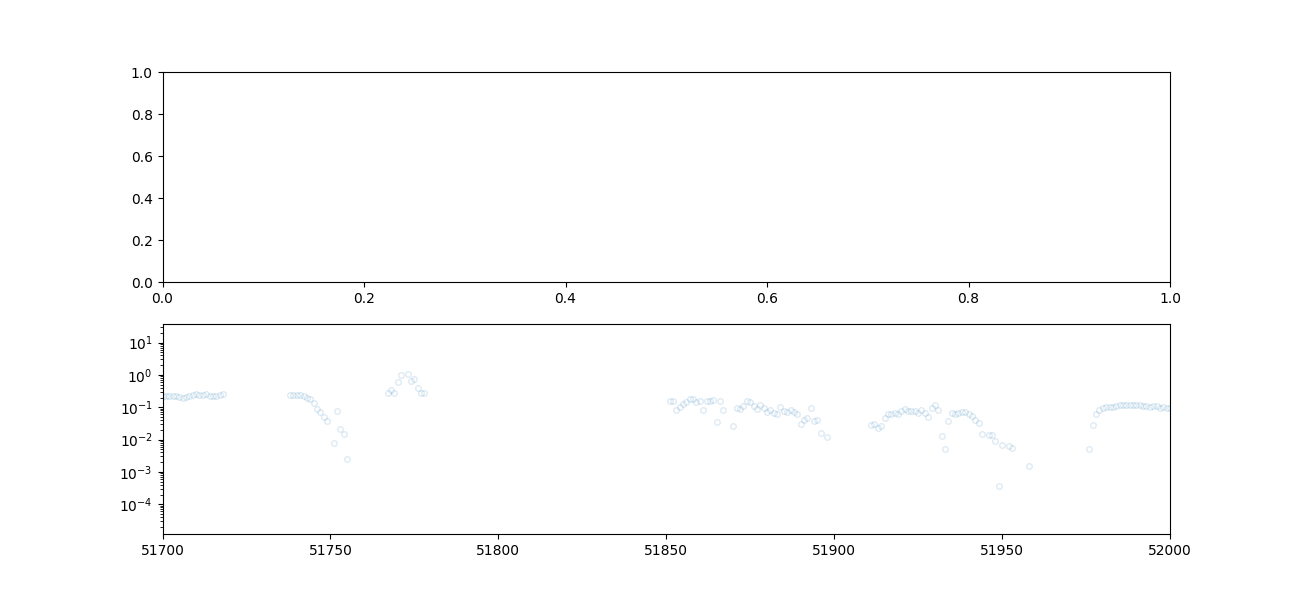

(51700.0, 52000.0)

In [40]:
# create acx_chl variable that merges the ac9_chl and acs_chl if available
#acs["acx_chl"] = (['time'], np.nanmean(np.asarray([acs['ac9_chl_adj'].values, acs['acs_chl'].values]), axis=0) )
#acs["acx_chl"].attrs = {"acx_chl_units":"mg/m3",
                      # "acx_chl_comment":"merged the ac9_chl and acs_chl",
                     #  }

# plot it
fig,ax = plt.subplots(2,1, figsize=[13,6])
#ax[0].semilogy(acs.time, acs.acx_chl, 'ro', lw=0.5, ms=5, mfc='none', alpha=0.05)
#ax[0].semilogy(acs.time, acs.acs_chl, '.', lw=0.5, ms=1, mfc='none', alpha=0.15)
#ax[0].semilogy(acs.time, acs.ac9_chl_adj, 'k.', lw=0.5, ms=1, mfc='none', alpha=0.15)

#ax[1].semilogy(np.arange(len(acs.time)), acs.acx_chl, 'ro', lw=0.5, ms=5, mfc='none', alpha=0.15)
ax[1].semilogy(np.arange(len(acs.time)), acs.acs_chl, '.', lw=0.5, ms=8, mfc='none', alpha=0.15)
plt.xlim(51700,52000)
#ax[1].semilogy(np.arange(len(acs.time)), acs.ac9_chl_adj, 'k.', lw=0.5, ms=1, mfc='none', alpha=0.15)

In [41]:
acs

<xarray.Dataset>
Dimensions:                                  (time: 59040, acs_wv: 176,
                                              ac9_wv: 9, bb3_wv: 3,
                                              hplc_time: 81)
Coordinates:
  * time                                     (time) datetime64[ns] 2016-09-23...
  * acs_wv                                   (acs_wv) float64 400.0 ... 750.0
  * ac9_wv                                   (ac9_wv) float64 nan nan ... nan
  * bb3_wv                                   (bb3_wv) float64 470.0 532.0 700.0
  * hplc_time                                (hplc_time) datetime64[ns] 2016-...
Data variables: (12/116)
    flow                                     (time) float64 ...
    acs_chl                                  (time) float64 nan nan ... nan nan
    acs_ap                                   (time, acs_wv) float64 ...
    acs_ap_u                                 (time, acs_wv) float64 ...
    acs_bp                                   (time, acs_wv) float64 ...
    acs_bp_u                                 (time, acs_wv) float64 ...
    ...                                       ...
    hplc_1_micron_(m)_or_not_(n)             (hplc_time) object 'N' 'N' ... 'N'
    hplc_notes                               (hplc_time) object 'Issues with ...
    hplc_Chl_c1c2                            (hplc_time) float64 0.05525 ... ...
    hplc_Tcar                                (hplc_time) float64 0.384 ... 0.338
    hplc_DP                                  (hplc_time) float64 0.4207 ... 0...
    hplc_file                                <U23 'AMT_26ESA_Pigments.xlsx'

In [42]:
# manually identify (using plot above) noisy parts of the acs_chl timeseries
i2rm = [ [1700, 2200], # start and end index of noisy period 1
         [36970,37200],  # start and end index of noisy period 2
         [51700,52000]  # start and end index of noisy period 3
       ]

# set values to nan inside the above intervals
for istart,tmp in enumerate(i2rm):
    print(istart, tmp[0], tmp[1])
    acs['acs_chl'].values[tmp[0]:tmp[1]] = np.nan
    acs['acs_ap'].values[tmp[0]:tmp[1], :] = np.nan
    acs['acs_ap_u'].values[tmp[0]:tmp[1], :] = np.nan


0 1700 2200
1 36970 37200
2 51700 52000


<IPython.core.display.Javascript object>


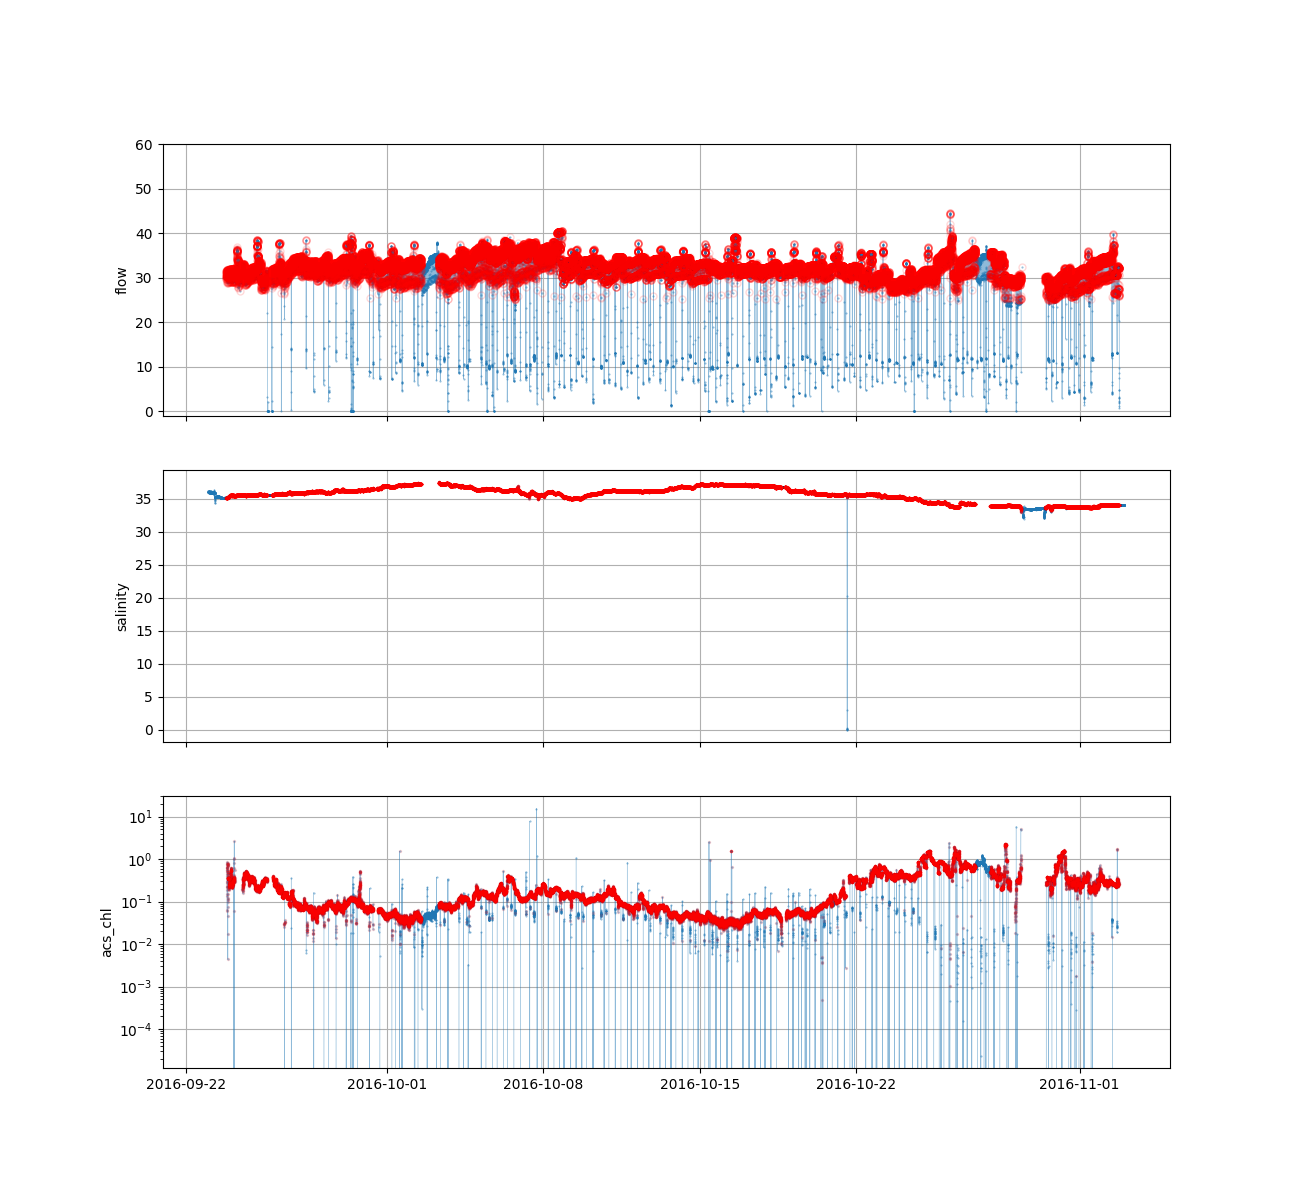

In [43]:
# filter acs data for MQ and noisy events
MIN_FLOW_RATE = 25
MIN_SAL = 33

i2f = np.where(  (acs.flow>MIN_FLOW_RATE) & (acs.uway_sal>MIN_SAL)   )[0]

fig, ax = plt.subplots(3,1, figsize=(13, 12), sharex=True)
ax[0].plot(acs.time, acs.flow, '.-', lw=0.5, ms=1, alpha=0.5)
ax[0].plot(acs.time[i2f], acs.flow[i2f], 'ro', lw=0.5, ms=5, mfc='none', alpha=0.15)
ax[0].set_ylabel('flow')
ax[0].grid('on')
ax[0].set_ylim([-1, 60])

# fig0, ax0 = plt.subplots(1, figsize=(15, 5))
ax[1].plot(acs.time, acs.uway_sal, '.-', lw=0.5, ms=1, alpha=0.5)
ax[1].plot(acs.time[i2f], acs.uway_sal[i2f], 'r.', lw=0.1, ms=3, mfc='none', alpha=0.15)
ax[1].set_ylabel('salinity')
ax[1].grid('on')

# fig2, ax2 = plt.subplots(1, figsize=(15, 5))
ax[2].semilogy(acs.time, acs.acs_chl, '.-', lw=0.5, ms=1, alpha=0.5)
ax[2].semilogy(acs.time[i2f], acs.acs_chl[i2f], 'r.', lw=0.1, ms=3, mfc='none', alpha=0.15)
ax[2].set_ylabel('acs_chl')
ax[2].grid('on')
# plt.ylim([1e-6, 10])

#print(i2f)
#len(i2f)
#for i in range(len)
 #   print(istart, tmp[0], tmp[1])
  #  acs['acs_chl'].values[tmp[0]:tmp[1]] = np.nan
   # acs['acs_ap'].values[tmp[0]:tmp[1], :] = np.nan
   #acs['acs_ap_u'].values[tmp[0]:tmp[1], :] = np.nan
#for istart,tmp in enumerate(i2f):
 #   print(istart, tmp[0], tmp[1])
  #  acs['acs_chl'].values[tmp[0]:tmp[1]] = np.nan
   # acs['acs_ap'].values[tmp[0]:tmp[1], :] = np.nan
   # acs['acs_ap_u'].values[tmp[0]:tmp[1], :] = np.nan


In [44]:

df_hplc_surf.keys()
list(df_hplc['STATION'])
#f_UND = df_hplc_surfloc[(df_hplc_surf['CTD'] == "UND") & (df_hplc_surf['Bottle'] == "UND")]
#df_CTD = f_hplc_surf.loc[(df_hplc_surf['CTD'] != "UND") & (df_hplc_surf['Bottle'] != "UND")]

['UND',
 'UND',
 'UND',
 'UND',
 'UND',
 '3',
 '3',
 'UND',
 'UND',
 '6',
 '6',
 'UND',
 'UND',
 'UND',
 '9',
 '9',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND',
 'UND']

<IPython.core.display.Javascript object>


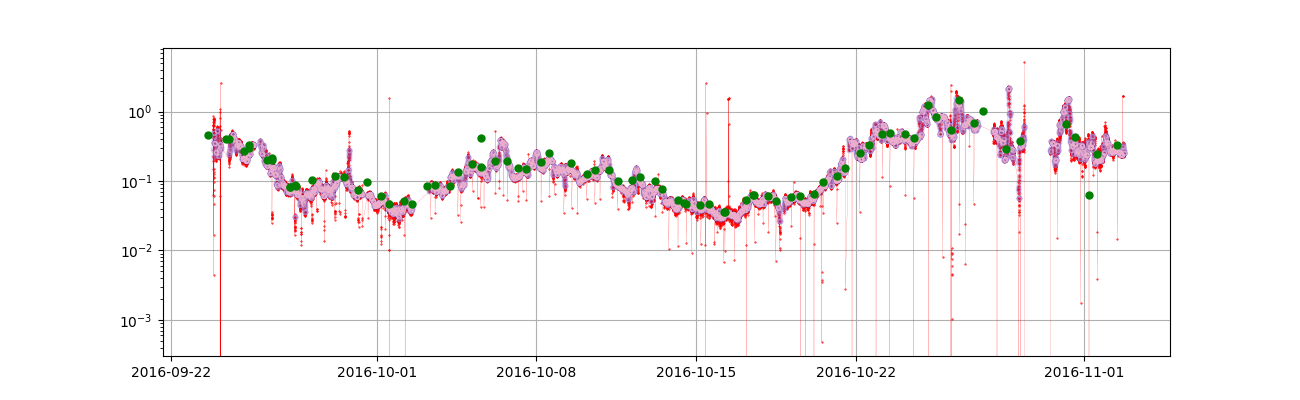

['flow', 'acs_chl', 'acs_ap', 'acs_ap_u', 'acs_bp', 'acs_bp_u', 'acs_cp', 'acs_cp_u', 'acs_N', 'ac9_chl', 'ac9_ap', 'ac9_ap_u', 'ac9_bp', 'ac9_bp_u', 'ac9_cp', 'ac9_cp_u', 'ac9_N', 'bb3_bbp', 'bb3_bbp_err', 'bb3_bb02', 'bb3_bb02_err', 'bb3_bbp_corr', 'cstar_cp', 'cstar_cp_err', 'ctd_sst', 'ctd_sal', 'uway_lat', 'uway_lon', 'uway_air_temp1', 'uway_humidity1', 'uway_par', 'uway_tir1', 'uway_air_temp2', 'uway_humidity2', 'uway_par2', 'uway_tir2', 'uway_baro1', 'uway_baro2', 'uway_thermosalinograph_temp', 'uway_conductivity', 'uway_sal', 'uway_velocity', 'uway_chl', 'uway_sample_temp', 'uway_flowrate', 'uway_sst', 'uway_field28th', 'uway_field29th', 'hplc_label', 'hplc_sample_collector', 'hplc_cruise_name', 'hplc_volume_filtered_(l)', 'hplc_name_of_water_body', 'hplc_depth', 'hplc_filter_storage_before_analysis', 'hplc_filter_type', 'hplc_filter_diameter', 'hplc_Tot_Chl_a', 'hplc_Tot_Chl_b', 'hplc_Tot_Chl_c', 'hplc_Alpha-beta-Car', 'hplc_Allo', 'hplc_But-fuco', 'hplc_Diadino', 'hplc_Diato'

/tmp/ipykernel_381927/3640219094.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax2.semilogy(acs.time[i2f][innan], sg.medfilt(acs.acs_chl[i2f][innan], kernel_size=31),'bo',color='pink', lw=1, ms=3, mfc='none', alpha = 0.05)


In [45]:
# median filter data
MEDFILT_WIN = 31 # 31

innan = np.where(~np.isnan(acs.acs_chl[i2f]))[0] # need to remove nans to prevent medfilt to be spiky near edges

fig2, ax2 = plt.subplots(1, figsize=(13, 4))
ax2.semilogy(acs.time[i2f][innan], acs.acs_chl[i2f][innan], 'r.-', lw=0.1, ms=1, mfc='none')
ax2.semilogy(acs.time[i2f][innan], sg.medfilt(acs.acs_chl[i2f][innan], kernel_size=MEDFILT_WIN), 'bo', lw=1, ms=3, mfc='none', alpha = 0.05)
ax2.semilogy(acs.time[i2f][innan], sg.medfilt(acs.acs_chl[i2f][innan], kernel_size=31),'bo',color='pink', lw=1, ms=3, mfc='none', alpha = 0.05)
ax2.grid('on')
# plt.ylim([1e-6, 10])

print(list(acs.keys()))
ax2.semilogy(acs.hplc_time, acs.hplc_Tot_Chl_a, 'go', ms=5, alpha=1)#, mfc='none')
#a2.semilogy(df_CTD.index, df_CTD.Tot_Chl_a, 'ko', ms=7, alpha=1, mfc='none', zorder=60)
#ax2.scatter(df_CTD.index, df_CTD.Tot_Chl_a, c=df_CTD.Bottle.values, s=30, alpha=1, zorder=60, cmap = plt.get_cmap('inferno'), vmin=2, vmax=24)
#ax2.semilogy(df_UND.index, df_UND.Tot_Chl_a, 'ks', ms=7, alpha=0.85, mfc='c')

<IPython.core.display.Javascript object>


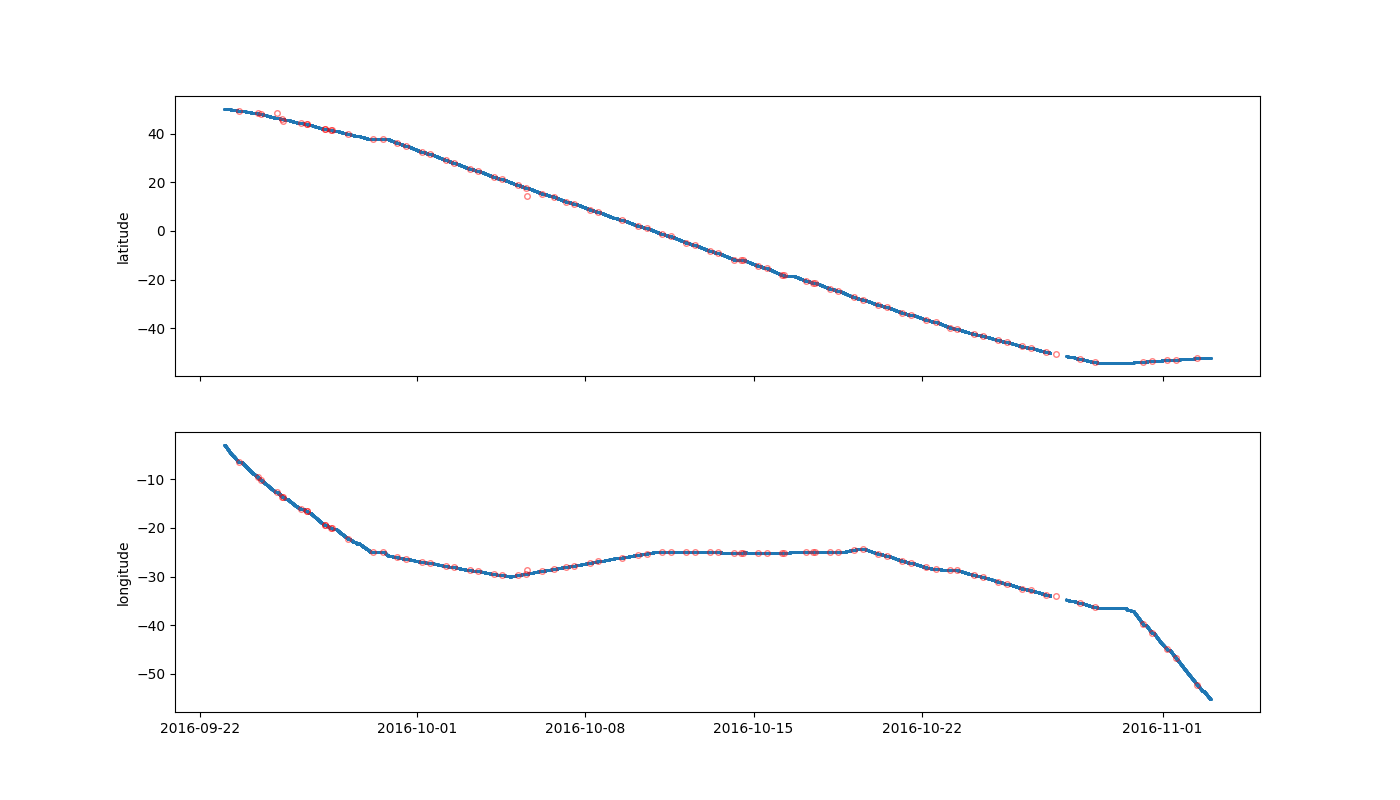

Text(0, 0.5, 'longitude')

In [46]:
# compare lat and lon of hplc and acs datasets
fig, ax = plt.subplots(2, 1, figsize = (14, 8), sharex = True)

ax[0].plot(acs.time, acs.uway_lat, '.', ms = 1, mfc = 'none')
ax[0].plot(acs.hplc_time, acs.hplc_lat, 'ro', ms = 4, mfc = 'none', alpha = 0.5)
ax[0].set_ylabel("latitude")
ax[1].plot(acs.time, acs.uway_lon, '.', ms = 1, mfc = 'none')
ax[1].plot(acs.hplc_time, acs.hplc_lon, 'ro', ms = 4, mfc = 'none', alpha = 0.5)
ax[1].set_ylabel("longitude")

In [47]:
# # merge HPCL and ACS data
# # see https://stackoverflow.com/questions/26517125/combine-two-pandas-dataframes-resample-on-one-time-column-interpolate

# # create pandas series with HPLC Tot_Chl_a data
#ds_hplc_surf = pd.Series(df_hplc_surf.Tot_Chl_a.values, index = df_hplc_surf.index)

#print(df_hplc_surf)

# averages duplicate values
#ds_hplc_surf = ds_hplc_surf.groupby('time').mean() # note - time field sometimes called date?



# # create pandas series with medfilt ACS data
#df_acs = pd.Series(sg.medfilt(acs.acs_chl[i2f][innan], kernel_size=31), index = acs.time.values[i2f][innan])



#df_hplc_acs = pd.DataFrame({'Tot_Chl_a': ds_hplc_surf, 'acs_chl': df_acs})

#df_hplc_acs = df_hplc_acs.interpolate('index').reindex(ds_hplc_surf.index)
# df_hplc_acs



In [48]:
#df_CTD.keys()

/tmp/ipykernel_381927/1705874145.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hplc_surf = df_hplc_surf.groupby('time').mean()


<IPython.core.display.Javascript object>


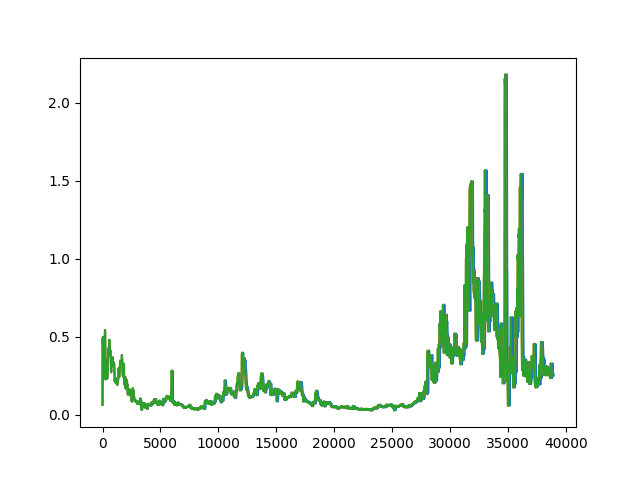

In [49]:
df_hplc_surf = df_hplc_surf
# merge HPCL and ACS data
# see https://stackoverflow.com/questions/26517125/combine-two-pandas-dataframes-resample-on-one-time-column-interpolate
# here made with dataframe instead of series

# averages duplicate values
df_hplc_surf = df_hplc_surf.groupby('time').mean() 


#step x - # filters w.r.t. i2fn (mQ interval + previous manual spike removal) and innan
plt.figure()
ix = xr.DataArray(acs.time[i2f][innan], dims=['time']) 
acs_filtered_x = acs.sel(time = ix)
acs_filtered_x['acs_chl'].values = sg.medfilt(acs.acs_chl[i2f][innan], kernel_size=31) # apply med filter to acx chl and acx chl debiasesd 
plt.plot(acs_filtered_x['acs_chl'].values)


#step y - # filters w.r.t. ap (10the element) being > 0
i2kp = np.where((acs_filtered_x.acs_ap[:,10] > 0)) [0]
iy = xr.DataArray(acs_filtered_x.time[i2kp], dims=['time']) 
acs_filtered_xy = acs_filtered_x.sel(time = iy)
plt.plot(acs_filtered_xy['acs_chl'].values)

#step z - # filters w.r.t. acs chl being > 0
i2kp = np.where((acs_filtered_xy.acs_chl[:] > 0)) [0]
iz = xr.DataArray(acs_filtered_xy.time[i2kp], dims=['time']) 
acs_filtered_xyz = acs_filtered_xy.sel(time = iz)
plt.plot(acs_filtered_xyz['acs_chl'].values)


# create pandas series with medfilt ACS data
df_acs = pd.Series(acs_filtered_xyz['acs_chl'].values,index = acs_filtered_xyz.time.values)
df_hplc_acs = pd.DataFrame({'Tot_Chl_a': df_hplc_surf.Tot_Chl_a, 'acs_chl': df_acs})
df_hplc_acs = df_hplc_acs.interpolate('index',limit=1).reindex(df_hplc_surf.index,method='nearest',tolerance='30min')
    
  

In [50]:
print(df_hplc_acs)

                     Tot_Chl_a   acs_chl
time                                    
2016-09-23 15:00:00   0.459103       NaN
2016-09-24 09:15:00   0.400712  0.264203
2016-09-24 12:18:00   0.407093       NaN
2016-09-25 04:21:00   0.273110  0.201946
2016-09-25 09:53:00   0.325302  0.251559
...                        ...       ...
2016-10-31 04:46:00   0.658301  0.698731
2016-10-31 13:51:00   0.425061  0.349653
2016-11-01 04:47:00   0.062193  0.355846
2016-11-01 13:28:00   0.242543  0.208794
2016-11-02 10:36:00   0.327624  0.266755

[80 rows x 2 columns]


In [51]:
# compute residuals and stats (lin and log space)
rres = df_hplc_acs.acs_chl.values / df_hplc_acs.Tot_Chl_a.values - 1

rres_log = np.log10(df_hplc_acs.acs_chl.values) / np.log10(df_hplc_acs.Tot_Chl_a.values) - 1

delta = np.nanmedian(rres)
delta_log = np.nanmedian(rres_log)
sigma = prcrng(rres)
sigma_log = prcrng(rres_log)
N = np.sum(~np.isnan(rres))

print(delta, sigma, N)

print(delta_log, sigma_log, N)




-0.1300687411372925 0.07581108861986563 77
0.07254872297213977 0.09133386850986348 77


<IPython.core.display.Javascript object>


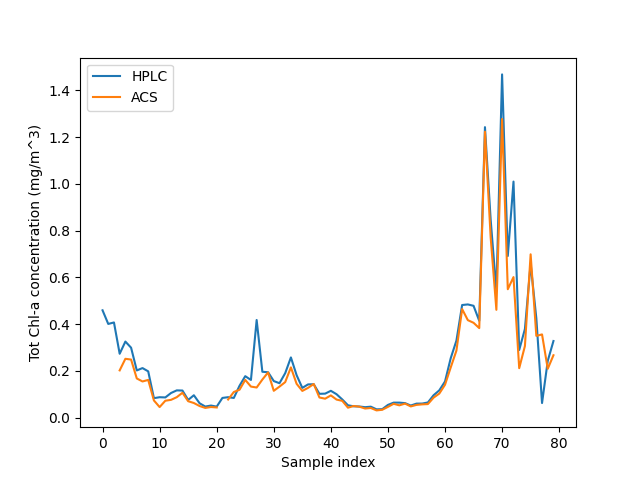

[0.45910316 0.40071204 0.40709259 0.27310989 0.32530157 0.29911043
 0.20172409 0.21183136 0.19785175 0.08307389 0.08713589 0.08621452
 0.10518879 0.11639542 0.11569358 0.07550799 0.09554095 0.0613088
 0.04716967 0.05144342 0.04686338 0.08405161 0.0872533  0.08405161
 0.13606878 0.17720801 0.16101536 0.41760347 0.1960314  0.19403045
 0.15625364 0.14706813 0.18991332 0.25741749 0.18146704 0.12710201
 0.14189568 0.14265795 0.10167361 0.10245526 0.11456549 0.09989892
 0.07750376 0.05252195 0.0482416  0.04739615 0.04445776 0.04666157
 0.03526324 0.03594404 0.05417188 0.06394896 0.06394896 0.06186075
 0.0514779  0.05968618 0.05994828 0.06465408 0.0956282  0.11658698
 0.15439391 0.25410505 0.32931453 0.4816801  0.48420546 0.47840977
 0.41403624 1.24294547 0.84673838 0.54143498 1.46869534 0.69151216
 1.00999148 0.28933085 0.37911061 0.65830111 0.42506076 0.06219274
 0.24254308 0.32762435]
[       nan 0.26420251        nan 0.20194558 0.25155889 0.24830265
 0.16737589 0.15457477 0.16109583 0.073

In [52]:
plt.figure()
plt.plot(df_hplc_acs.Tot_Chl_a.values,label='HPLC')
plt.plot(df_hplc_acs.acs_chl.values,label='ACS')
plt.ylabel('Tot Chl-a concentration (mg/m^3)')
plt.xlabel('Sample index')
plt.legend()

print(df_hplc_acs.Tot_Chl_a.values)
print(df_hplc_acs.acs_chl.values)


<IPython.core.display.Javascript object>


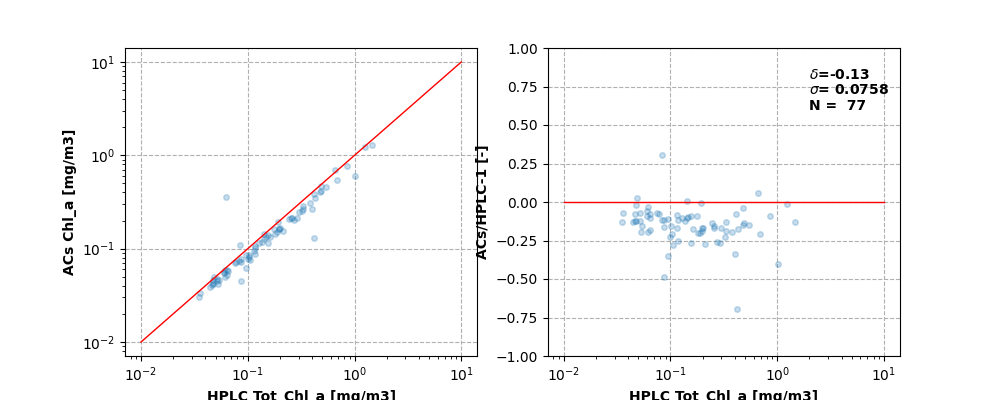

[0.45910316 0.40071204 0.40709259 0.27310989 0.32530157 0.29911043
 0.20172409 0.21183136 0.19785175 0.08307389 0.08713589 0.08621452
 0.10518879 0.11639542 0.11569358 0.07550799 0.09554095 0.0613088
 0.04716967 0.05144342 0.04686338 0.08405161 0.0872533  0.08405161
 0.13606878 0.17720801 0.16101536 0.41760347 0.1960314  0.19403045
 0.15625364 0.14706813 0.18991332 0.25741749 0.18146704 0.12710201
 0.14189568 0.14265795 0.10167361 0.10245526 0.11456549 0.09989892
 0.07750376 0.05252195 0.0482416  0.04739615 0.04445776 0.04666157
 0.03526324 0.03594404 0.05417188 0.06394896 0.06394896 0.06186075
 0.0514779  0.05968618 0.05994828 0.06465408 0.0956282  0.11658698
 0.15439391 0.25410505 0.32931453 0.4816801  0.48420546 0.47840977
 0.41403624 1.24294547 0.84673838 0.54143498 1.46869534 0.69151216
 1.00999148 0.28933085 0.37911061 0.65830111 0.42506076 0.06219274
 0.24254308 0.32762435]


In [55]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))

ax[0].loglog(df_hplc_acs.Tot_Chl_a.values, df_hplc_acs.acs_chl.values, 'o', ms=4, alpha=0.25)
x = np.logspace(np.log10(0.01), np.log10(10), 100)
ax[0].loglog(x, x, 'r-', lw=1)
ax[0].grid('on', ls='--')
ax[0].set_xlabel('HPLC Tot_Chl_a [mg/m3]', fontweight='bold')
ax[0].set_ylabel('ACs Chl_a [mg/m3]', fontweight='bold')

ax[1].semilogx(df_hplc_acs.Tot_Chl_a.values, rres, 'o', ms=4, alpha=0.25)
ax[1].semilogx(x, x*0, 'r-', lw=1)
ax[1].grid('on', ls='--')
ax[1].set_xlabel('HPLC Tot_Chl_a [mg/m3]', fontweight='bold')
ax[1].set_ylabel('ACs/HPLC-1 [-]', fontweight='bold')
ax[1].set_ylim([-1, 1])
ax[1].text(2, 0.8, r'$\delta$='+f'{delta:+0.3}', fontweight='bold')
ax[1].text(2, 0.7, r'$\sigma$='+f'{sigma: 0.3}', fontweight='bold')
ax[1].text(2, 0.6, f'N = {N: 0}', fontweight='bold')


print(df_hplc_acs.Tot_Chl_a.values)

<IPython.core.display.Javascript object>


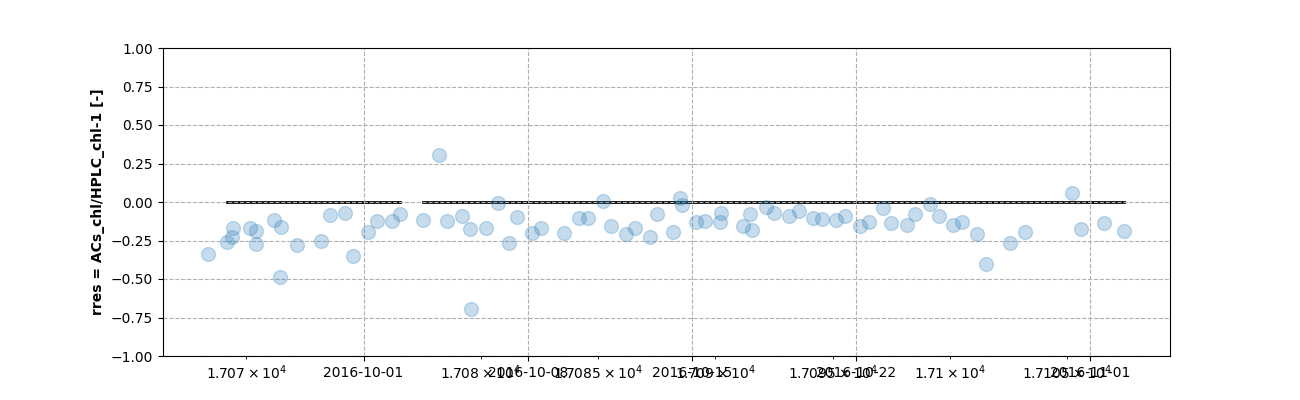

(-1.0, 1.0)

In [56]:
fig, ax = plt.subplots(1,1, figsize=(13, 4))
ax.semilogx(df_hplc_acs.index.values, rres, 'o', ms=10, alpha=0.25, zorder=60)
ax.plot(df_hplc_acs.index.values, rres*0, 'k-', lw=2, zorder=1)
ax.set_ylabel('rres = ACs_chl/HPLC_chl-1 [-]', fontweight='bold')
ax.grid('on', ls='--')
ax.set_ylim([-1, 1])

In [57]:
ilrg_rres = np.where(abs(rres)>0.5)[0]
print(rres[ilrg_rres])
df_hplc_surf_new.iloc[ilrg_rres]

[-0.69186122  4.72166997]


NameError: name 'df_hplc_surf_new' is not defined

In [58]:
df_hplc_surf_new.iloc[ilrg_rres].index.dayofyear
# tt.tm_yday

NameError: name 'df_hplc_surf_new' is not defined

In [59]:
df_hplc_surf_new.iloc[ilrg_rres].keys()

NameError: name 'df_hplc_surf_new' is not defined

In [60]:
# find dates of large rres
r = df_hplc_acs.acs_chl / df_hplc_acs.Tot_Chl_a - 1
ii = np.where(abs(r)>0.4)[0]
print(r[ii])
# iss = 2
# [df_hplc_acs.Tot_Chl_a[ii][iss], df_hplc_acs.acx_chl[ii][iss]]

time
2016-09-27 10:03:00   -0.483797
2016-10-05 13:43:00   -0.691861
2016-10-27 13:28:00   -0.404718
2016-11-01 04:47:00    4.721670
dtype: float64


In [61]:
# # de-bias ACS-chl following eq 3 in Graban et al., 2020 (https://doi.org/10.1364/OE.397863)
# df_hplc_acs.acs_chl_debiased = df_hplc_acs.acs_chl*(1-delta)

In [62]:
# # compute resuduals and stats
# rres = df_hplc_acs.acs_chl_debiased.values/df_hplc_acs.Tot_Chl_a.values-1

# delta = np.nanmedian(rres)
# sigma = prcrng(rres)
# N = len(rres)

# print(delta, sigma, N)

In [63]:


# fit data to power law -- not used.

# note - aphy == 0.014 *df_hplc_acs

from scipy.optimize import curve_fit

def func(x, a, b):
    return a * x**b

print(df_hplc_acs.acs_chl.values[np.isnan(df_hplc_acs.acs_chl)==0])

popt, pcov = curve_fit(func, 0.014*df_hplc_acs.acs_chl.values[np.isnan(df_hplc_acs.acs_chl)==0] , df_hplc_acs.Tot_Chl_a.values[np.isnan(df_hplc_acs.acs_chl)==0])

perr = np.sqrt(np.diag(pcov)) # parameter uncertainty 

print("chl_HPLC = a * chl_ACS^b " )

print("a = " + f'{popt[0]:.1f} ' + "+/- " + f'{2*perr[0]:.1f}' )
print("b = " + f'{popt[1]:.3f} ' + "+/- " + f'{2*perr[1]:.3f}' )



[0.26420251 0.20194558 0.25155889 0.24830265 0.16737589 0.15457477
 0.16109583 0.07328604 0.04497976 0.07211055 0.075889   0.0871972
 0.1061988  0.07004369 0.06227114 0.04944281 0.04134593 0.04518119
 0.0433025  0.07728353 0.10945945 0.11918081 0.16128799 0.13263127
 0.12867982 0.16263342 0.19325763 0.11462696 0.13247657 0.15173705
 0.2147424  0.14452276 0.11406537 0.12710203 0.14372502 0.0858804
 0.08083796 0.09487603 0.07700841 0.07158927 0.04229284 0.04954939
 0.04652646 0.03872355 0.04095336 0.03070917 0.03334367 0.04577825
 0.05894954 0.05238395 0.05979279 0.0476917  0.05424821 0.05655017
 0.05774127 0.08531402 0.10279081 0.14043231 0.21446673 0.28661606
 0.46429969 0.41692714 0.40562639 0.38290313 1.22340882 0.77109362
 0.46117801 1.27766398 0.54924444 0.60122975 0.21151501 0.30614528
 0.6987313  0.34965257 0.3558463  0.20879375 0.26675464]
chl_HPLC = a * chl_ACS^b 
a = 63.9 +/- 18.6
b = 0.950 +/- 0.061


In [64]:
# as previous but apply log transform prior to fitting
import scipy

linear_mod = scipy.stats.linregress(np.log10(0.014*df_hplc_acs.acs_chl.values[np.isnan(df_hplc_acs.acs_chl)==0]), np.log10(df_hplc_acs.Tot_Chl_a.values[np.isnan(df_hplc_acs.acs_chl)==0]))


A = np.round(100*linear_mod.intercept)/100
B = np.round(1000*linear_mod.slope)/1000
r_sq = np.round(1000*linear_mod.rvalue**2)/100

r_sq = np.round(1000*linear_mod.rvalue**2)/1000
stderr = np.round(1000*linear_mod.stderr)/1000
interr = np.round(1000*linear_mod.intercept_stderr)/1000


print('A = ' + str(10**A) + ' +/- ' + str(2*10**interr))
print('B = ' + str(B) + ' +/- ' + str(2*stderr))

print(r_sq)


A = 69.18309709189366 +/- 2.5120599273897497
B = 0.972 +/- 0.072
0.907


In [65]:
# fig, ax = plt.subplots(1,2, figsize=(10, 4))

# ax[0].loglog(df_hplc_acs.Tot_Chl_a.values, df_hplc_acs.acs_chl_debiased.values, 'o', ms=4, alpha=0.25)
# x = np.logspace(np.log10(0.01), np.log10(10), 100)
# ax[0].loglog(x, x, 'r-', lw=1)
# ax[0].grid('on', ls='--')
# ax[0].set_xlabel('HPLC Tot_Chl_a [mg/m3]', fontweight='bold')
# ax[0].set_ylabel('ACS Chl_a [mg/m3]', fontweight='bold')

# ax[1].semilogx(df_hplc_acs.Tot_Chl_a.values, rres, 'o', ms=4, alpha=0.25)
# ax[1].semilogx(x, x*0, 'r-', lw=1)
# ax[1].grid('on', ls='--')
# ax[1].set_xlabel('HPLC Tot_Chl_a [mg/m3]', fontweight='bold')
# ax[1].set_ylabel('ACS/HPLC-1 [-]', fontweight='bold')

# ax[1].text(2, 0.8, r'$\delta$='+f'{delta:+0.3}', fontweight='bold')
# ax[1].text(2, 0.7, r'$\sigma$='+f'{sigma: 0.3}', fontweight='bold')
# ax[1].text(2, 0.6, f'N = {N: 0}', fontweight='bold')


In [66]:
# de-bias ACS-chl following eq 3 in Graban et al., 2020 (https://doi.org/10.1364/OE.397863)
innan = np.where(~np.isnan(acs.acs_chl[i2f]))[0]
acs['acs_chl_debiased'] = acs.acs_chl*(1-delta)
# acs['acs_chl_debiased'] = acs.acs_chl*(1-delta)
acs_out = pd.DataFrame(data = {'lat [degN]': acs.uway_lat[i2f][innan],
                               'lon [degE]': acs.uway_lon[i2f][innan],
                               'acs_chl_debiased [mg_m3]': acs.acs_chl_debiased[i2f][innan]
                              }  ,
                      index = acs.time.values[i2f][innan])
acs_out.index.rename('date_time [UTC]', inplace = True)

In [67]:
# add attributes to acs_chl_debiased
acs.acs_chl_debiased.attrs["debiasing_equation"] = "acs.acs_chl_deiased = acs.acs_chl*(1-delta)"
acs.acs_chl_debiased.attrs["delta"] = delta
acs.acs_chl_debiased.attrs["sigma"] = sigma
acs.acs_chl_debiased.attrs["units"] = "mg/m3"
acs.acs_chl_debiased.attrs["comments"] = "delta=np.nanmedian(rres), sigma=prcrng(rres), rres=acs_chl/HPLC_Tot_Chl_a-1, based on surface data"
acs.acs_chl_debiased.attrs["HPLC_Tot_chla"] = df_hplc_acs.Tot_Chl_a.values
acs.acs_chl_debiased.attrs["HPLC_Tot_chla_units"] = "mg/m3"
acs.acs_chl_debiased.attrs["acs_chl"] = df_hplc_acs.acs_chl.values
acs.acs_chl_debiased.attrs["acs_chl_units"] = "mg/m3"
acs.acs_chl_debiased.attrs["processed_on"] = dt.now().strftime("%Y-%m-%d %H:%M:%S.%f")
acs.acs_chl_debiased.attrs["match_up_dates"] = df_hplc_acs.index.format()


<IPython.core.display.Javascript object>


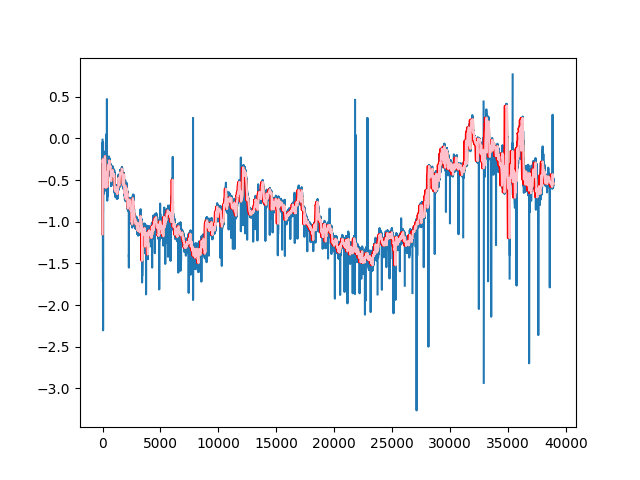

/tmp/ipykernel_381927/757522388.py:3: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(acs['acs_chl_debiased'].values[i2f][innan]))


In [68]:

#step x - # filters w.r.t. i2fn (mQ interval + previous manual spike removal) and innan
plt.figure()
plt.plot(np.log10(acs['acs_chl_debiased'].values[i2f][innan]))
ix = xr.DataArray(acs.time[i2f][innan], dims=['time']) 
acs_filtered_x = acs.sel(time = ix)
acs_filtered_x['acs_chl'].values = sg.medfilt(acs.acs_chl[i2f][innan], kernel_size=31) # apply med filter to acx chl and acx chl debiasesd 
acs_filtered_x['acs_chl_debiased'].values = sg.medfilt(acs.acs_chl_debiased[i2f][innan], kernel_size=31)


plt.plot(np.log10(acs_filtered_x['acs_chl_debiased'].values))



#step y - # filters w.r.t. ap (10the element) being > 0
i2kp = np.where((acs_filtered_x.acs_ap[:,10] > 0)) [0]
iy = xr.DataArray(acs_filtered_x.time[i2kp], dims=['time']) 
acs_filtered_xy = acs_filtered_x.sel(time = iy)

#step z - # filters w.r.t. acs chl being > 0
i2kp = np.where((acs_filtered_xy.acs_chl[:] > 0)) [0]
iz = xr.DataArray(acs_filtered_xy.time[i2kp], dims=['time']) 
acs_filtered_xyz = acs_filtered_xy.sel(time = iz)

plt.plot(np.log10(acs_filtered_xyz['acs_chl_debiased'].values),color='red')
plt.plot(np.log10(acs_filtered_x['acs_chl_debiased'].values), color='pink')

In [69]:
#acs_filtered2 = acs_filtered
#acs_filtered2 = acs_filtered2.rename_vars({'time_': 'time'}, )

<IPython.core.display.Javascript object>


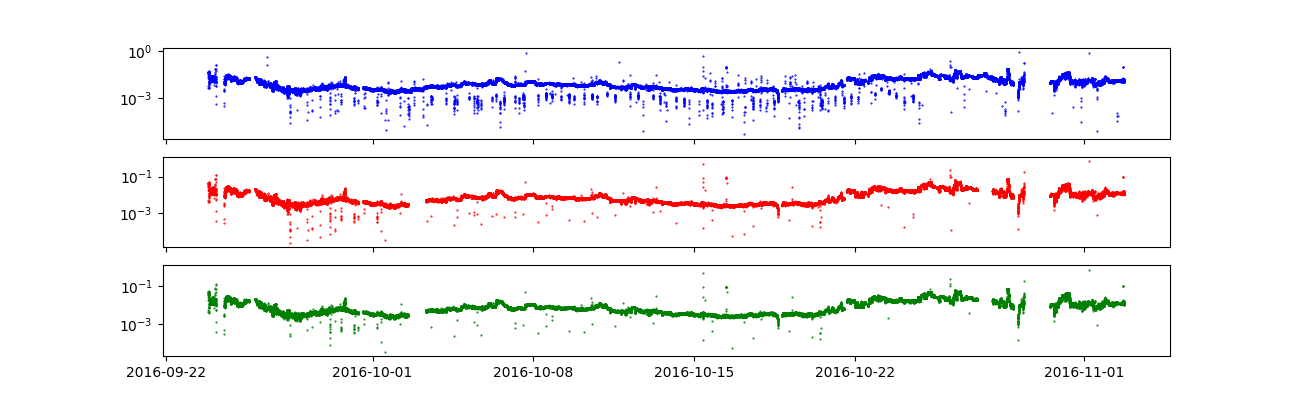

In [70]:
# plot to check                   
#iwv = np.where(acs_filtered.acs_wv==490)[0]
#fig, [ax, ax2] = plt.subplots(2,1, figsize=(13, 4), sharex=True)

#ax.semilogy(acs_filtered.time_[:], acs_filtered.acs_ap[:,iwv], 'b.', ms=1)
# ax.semilogy(acs_filtered.time_[:], sg.medfilt(x, 151), 'b.', ms=1)
#ax.semilogy(acs_filtered2.time, acs_filtered2.acs_ap[:,iwv], 'ro', ms=1, mfc='none', alpha=0.5)
#ax.grid('on')

#ax2.grid('on')

fig, [ax, ax2, ax3] = plt.subplots(3,1, figsize=(13, 4), sharex=True)

iwv = np.where(acs_filtered_x.acs_wv==490)[0]
ax.semilogy(acs.time[:], acs.acs_ap[:,iwv], 'b.', ms=1)

iwv_x = np.where(acs_filtered_x.acs_wv==490)[0]
ax2.semilogy(acs_filtered_x.time[:], acs_filtered_x.acs_ap[:,iwv_x], 'r.', ms=1)

iwv_y = np.where(acs_filtered_xy.acs_wv==490)[0]
ax3.semilogy(acs_filtered_xy.time[:], acs_filtered_xy.acs_ap[:,iwv_y], 'g.', ms=1)
#ax.semilogy(acs_filtered.time[:], sg.medfilt(x, 151), 'b.', ms=1)
#ax.semilogy(acs_filtered2.time, acs_filtered2.acs_ap[:,iwv], 'ro', ms=1, mfc='none', alpha=0.5)
#ax.grid('on')


In [71]:
# save to file for Silvia
# acs_out.to_csv('AMT29_ACS_chl_debiased.csv')
acs_filtered2 =acs_filtered_xyz 

In [72]:
#test for similar keys between AMT28 and AMT29 (baseline)

#load AMT29 (baseline for netcdf)
path_nc_29 = '/data/lazarev1/backup/cruise_data/AMT29/Public_Read_Only_Copy/DY110_Public/Optics_group/Processed/Underway/Step3/amt29_final_with_debiased_chl.nc'
nc_data_29 = xr.open_dataset(path_nc_29)  


#test for common and unqiue keys
keys_26 = list(acs_filtered2.keys())
keys_29 = list(nc_data_29.keys())
common_keys = set(keys_26).intersection(set(keys_29)) # keys contained in both cruises
extra_keys_26 =  set(keys_26) ^ common_keys # extra keys in AMT 28
extra_keys_29 = set(keys_29) ^ common_keys # extra keys in AMT29

print('common keys')
print(sorted(common_keys))

print('/n extra keys in amt26')
print(sorted(extra_keys_26))

# manual clean up of AMT 27 keys
# acs_filtered_xy = acs_filtered_xy.rename_vars({"uway_lon": "uway_long"})
# acs_filtered_xy = acs_filtered_xy.drop("ac9_N")
# acs_filtered_xy = acs_filtered_xy.drop("ac9_chl")

# manual clean up of AMT 26 keys
acs_filtered2 = acs_filtered2.drop('ac9_N')
acs_filtered2 = acs_filtered2.drop('ac9_ap')
acs_filtered2 = acs_filtered2.drop('ac9_ap_u')
acs_filtered2 = acs_filtered2.drop('ac9_bp')
acs_filtered2 = acs_filtered2.drop('ac9_bp_u')
acs_filtered2 = acs_filtered2.drop('ac9_chl')
acs_filtered2 = acs_filtered2.drop('ac9_cp')
acs_filtered2 = acs_filtered2.drop('ac9_cp_u')
acs_filtered2 = acs_filtered2.drop('hplc_1_micron_(m)_or_not_(n)') # redumdant

# clean-up extra pigments
acs_filtered2 = acs_filtered2.drop('hplc_[ppc]/[tpig]') # redumdant
acs_filtered2 = acs_filtered2.drop('hplc_[psp]/[tpig]') # redumdant
acs_filtered2 = acs_filtered2.drop('hplc_[tacc]/[tchla]') # redumdant
acs_filtered2 = acs_filtered2.drop('hplc_[tchl_a]/[tpig]') # redumdant
acs_filtered2 = acs_filtered2.drop('hplc__[chl_c2mgdg-1]') # redumdant
acs_filtered2 = acs_filtered2.drop('hplc__[chl_c2mgdg-2]') # redumdant

acs_filtered_xy = acs_filtered_xy.rename_vars({"uway_lon": "uway_long"})

print('/n extra keys in amt29')
print(sorted(extra_keys_29))

print('/n extra keys in amt26')
print(sorted(extra_keys_26))
sorted(acs_filtered2.keys())

common keys
['acs_N', 'acs_ap', 'acs_ap_u', 'acs_bp', 'acs_bp_u', 'acs_chl', 'acs_chl_debiased', 'acs_cp', 'acs_cp_u', 'bb3_bb02', 'bb3_bb02_err', 'bb3_bbp', 'bb3_bbp_corr', 'bb3_bbp_err', 'cstar_cp', 'cstar_cp_err', 'ctd_sal', 'ctd_sst', 'flow', 'hplc_Allo', 'hplc_Alpha-beta-Car', 'hplc_But-fuco', 'hplc_Chl_c1c2', 'hplc_Chl_c3', 'hplc_Chlide_a', 'hplc_DP', 'hplc_DV_Chl_a', 'hplc_Diadino', 'hplc_Diato', 'hplc_Fuco', 'hplc_Hex-fuco', 'hplc_Lut', 'hplc_Neo', 'hplc_PPC', 'hplc_PSC', 'hplc_PSP', 'hplc_Perid', 'hplc_Pras', 'hplc_Tacc', 'hplc_Tcar', 'hplc_Tot_Chl_a', 'hplc_Tot_Chl_b', 'hplc_Tot_Chl_c', 'hplc_Tpg', 'hplc_Viola', 'hplc_Zea', 'hplc_bottle', 'hplc_depth', 'hplc_filter_diameter', 'hplc_filter_type', 'hplc_lat', 'hplc_lon', 'hplc_station', 'uway_conductivity', 'uway_flowrate', 'uway_lat', 'uway_par2', 'uway_sal', 'uway_sst', 'uway_thermosalinograph_temp', 'uway_tir1', 'uway_tir2']
/n extra keys in amt26
['ac9_N', 'ac9_ap', 'ac9_ap_u', 'ac9_bp', 'ac9_bp_u', 'ac9_chl', 'ac9_cp', 'ac

['acs_N',
 'acs_ap',
 'acs_ap_u',
 'acs_bp',
 'acs_bp_u',
 'acs_chl',
 'acs_chl_debiased',
 'acs_cp',
 'acs_cp_u',
 'bb3_bb02',
 'bb3_bb02_err',
 'bb3_bbp',
 'bb3_bbp_corr',
 'bb3_bbp_err',
 'cstar_cp',
 'cstar_cp_err',
 'ctd_sal',
 'ctd_sst',
 'flow',
 'hplc_Allo',
 'hplc_Alpha-beta-Car',
 'hplc_Asta',
 'hplc_But-fuco',
 'hplc_Chl_a',
 'hplc_Chl_c1',
 'hplc_Chl_c1c2',
 'hplc_Chl_c2',
 'hplc_Chl_c3',
 'hplc_Chlide_a',
 'hplc_DP',
 'hplc_DV_Chl_a',
 'hplc_Diadino',
 'hplc_Diato',
 'hplc_Fuco',
 'hplc_Hex-fuco',
 'hplc_Lut',
 'hplc_Mg_DVP',
 'hplc_Neo',
 'hplc_PML_only_Anth',
 'hplc_PML_only_Chl_b_DVChl_b',
 'hplc_PPC',
 'hplc_PSC',
 'hplc_PSP',
 'hplc_Perid',
 'hplc_Pras',
 'hplc_TChl',
 'hplc_Tacc',
 'hplc_Tcar',
 'hplc_Tot_Chl_a',
 'hplc_Tot_Chl_b',
 'hplc_Tot_Chl_c',
 'hplc_Tpg',
 'hplc_Viola',
 'hplc_Zea',
 'hplc_beta-beta-Car',
 'hplc_beta-epi-Car',
 'hplc_blank_intentionally',
 'hplc_bottle',
 'hplc_cruise_name',
 'hplc_cryobox_hplc',
 'hplc_ctd',
 'hplc_depth',
 'hplc_file',
 'hp

In [74]:

#test for common and unqiue keys
keys_26 = list(acs_filtered2.keys())
keys_29 = list(nc_data_29.keys())
common_keys = set(keys_26).intersection(set(keys_29)) # keys contained in both cruises
extra_keys_26 =  set(keys_26) ^ common_keys # extra keys in AMT 28
extra_keys_29 = set(keys_29) ^ common_keys # extra keys in AMT29

print('/n extra keys in amt29')
print(sorted(extra_keys_29))

print('/n extra keys in amt26')
print(sorted(extra_keys_26))
sorted(acs_filtered2.keys())


/n extra keys in amt29
['ay440', 'ay_slope', 'cy440', 'cy_slope', 'hplc_DV_Chl_b', 'hplc_Gyro', 'hplc_MV_Chl_a', 'hplc_MV_Chl_b', 'hplc_PI', 'hplc_PPC_Tcar', 'hplc_PPC_Tpg', 'hplc_PSC_Tcar', 'hplc_PSP_Tpg', 'hplc_Phide_a', 'hplc_Phytin_a', 'hplc_Tacc_Tchla', 'hplc_Tchl', 'hplc_Tchl_Tcar', 'hplc_Tchl_a_Tpg', 'hplc_comments', 'hplc_cruise', 'hplc_filter_storage_before_shipment_to_GFC', 'hplc_hplc_gsfc_id', 'hplc_indicate_if_filters_are_replicates', 'hplc_sample', 'hplc_volfilt', 'uway_air_temp', 'uway_baro', 'uway_depthm', 'uway_fluo', 'uway_gndcourse', 'uway_gndspeed', 'uway_heading', 'uway_heave', 'uway_humidity', 'uway_long', 'uway_par1', 'uway_pitch', 'uway_roll', 'uway_trans', 'uway_wind_dir', 'uway_wind_vel']
/n extra keys in amt26
['hplc_Asta', 'hplc_Chl_a', 'hplc_Chl_c1', 'hplc_Chl_c2', 'hplc_Mg_DVP', 'hplc_PML_only_Anth', 'hplc_PML_only_Chl_b_DVChl_b', 'hplc_TChl', 'hplc_beta-beta-Car', 'hplc_beta-epi-Car', 'hplc_blank_intentionally', 'hplc_cruise_name', 'hplc_cryobox_hplc', 'hp

['acs_N',
 'acs_ap',
 'acs_ap_u',
 'acs_bp',
 'acs_bp_u',
 'acs_chl',
 'acs_chl_debiased',
 'acs_cp',
 'acs_cp_u',
 'bb3_bb02',
 'bb3_bb02_err',
 'bb3_bbp',
 'bb3_bbp_corr',
 'bb3_bbp_err',
 'cstar_cp',
 'cstar_cp_err',
 'ctd_sal',
 'ctd_sst',
 'flow',
 'hplc_Allo',
 'hplc_Alpha-beta-Car',
 'hplc_Asta',
 'hplc_But-fuco',
 'hplc_Chl_a',
 'hplc_Chl_c1',
 'hplc_Chl_c1c2',
 'hplc_Chl_c2',
 'hplc_Chl_c3',
 'hplc_Chlide_a',
 'hplc_DP',
 'hplc_DV_Chl_a',
 'hplc_Diadino',
 'hplc_Diato',
 'hplc_Fuco',
 'hplc_Hex-fuco',
 'hplc_Lut',
 'hplc_Mg_DVP',
 'hplc_Neo',
 'hplc_PML_only_Anth',
 'hplc_PML_only_Chl_b_DVChl_b',
 'hplc_PPC',
 'hplc_PSC',
 'hplc_PSP',
 'hplc_Perid',
 'hplc_Pras',
 'hplc_TChl',
 'hplc_Tacc',
 'hplc_Tcar',
 'hplc_Tot_Chl_a',
 'hplc_Tot_Chl_b',
 'hplc_Tot_Chl_c',
 'hplc_Tpg',
 'hplc_Viola',
 'hplc_Zea',
 'hplc_beta-beta-Car',
 'hplc_beta-epi-Car',
 'hplc_blank_intentionally',
 'hplc_bottle',
 'hplc_cruise_name',
 'hplc_cryobox_hplc',
 'hplc_ctd',
 'hplc_depth',
 'hplc_file',
 'hp

In [79]:
print(np.sum(~np.isnan(acs_filtered2.uway_lat)))
print(np.sum(~np.isnan(acs_filtered2.acs_chl)))

<xarray.DataArray 'uway_lat' ()>
array(38767)
<xarray.DataArray 'acs_chl' ()>
array(38767)


In [80]:
# save updated NetCDF file

acs_filtered2.to_netcdf(DIN_acs+fn_acs[:-3]+'_with_debiased_chl.nc')
acs_filtered2.close()

<IPython.core.display.Javascript object>


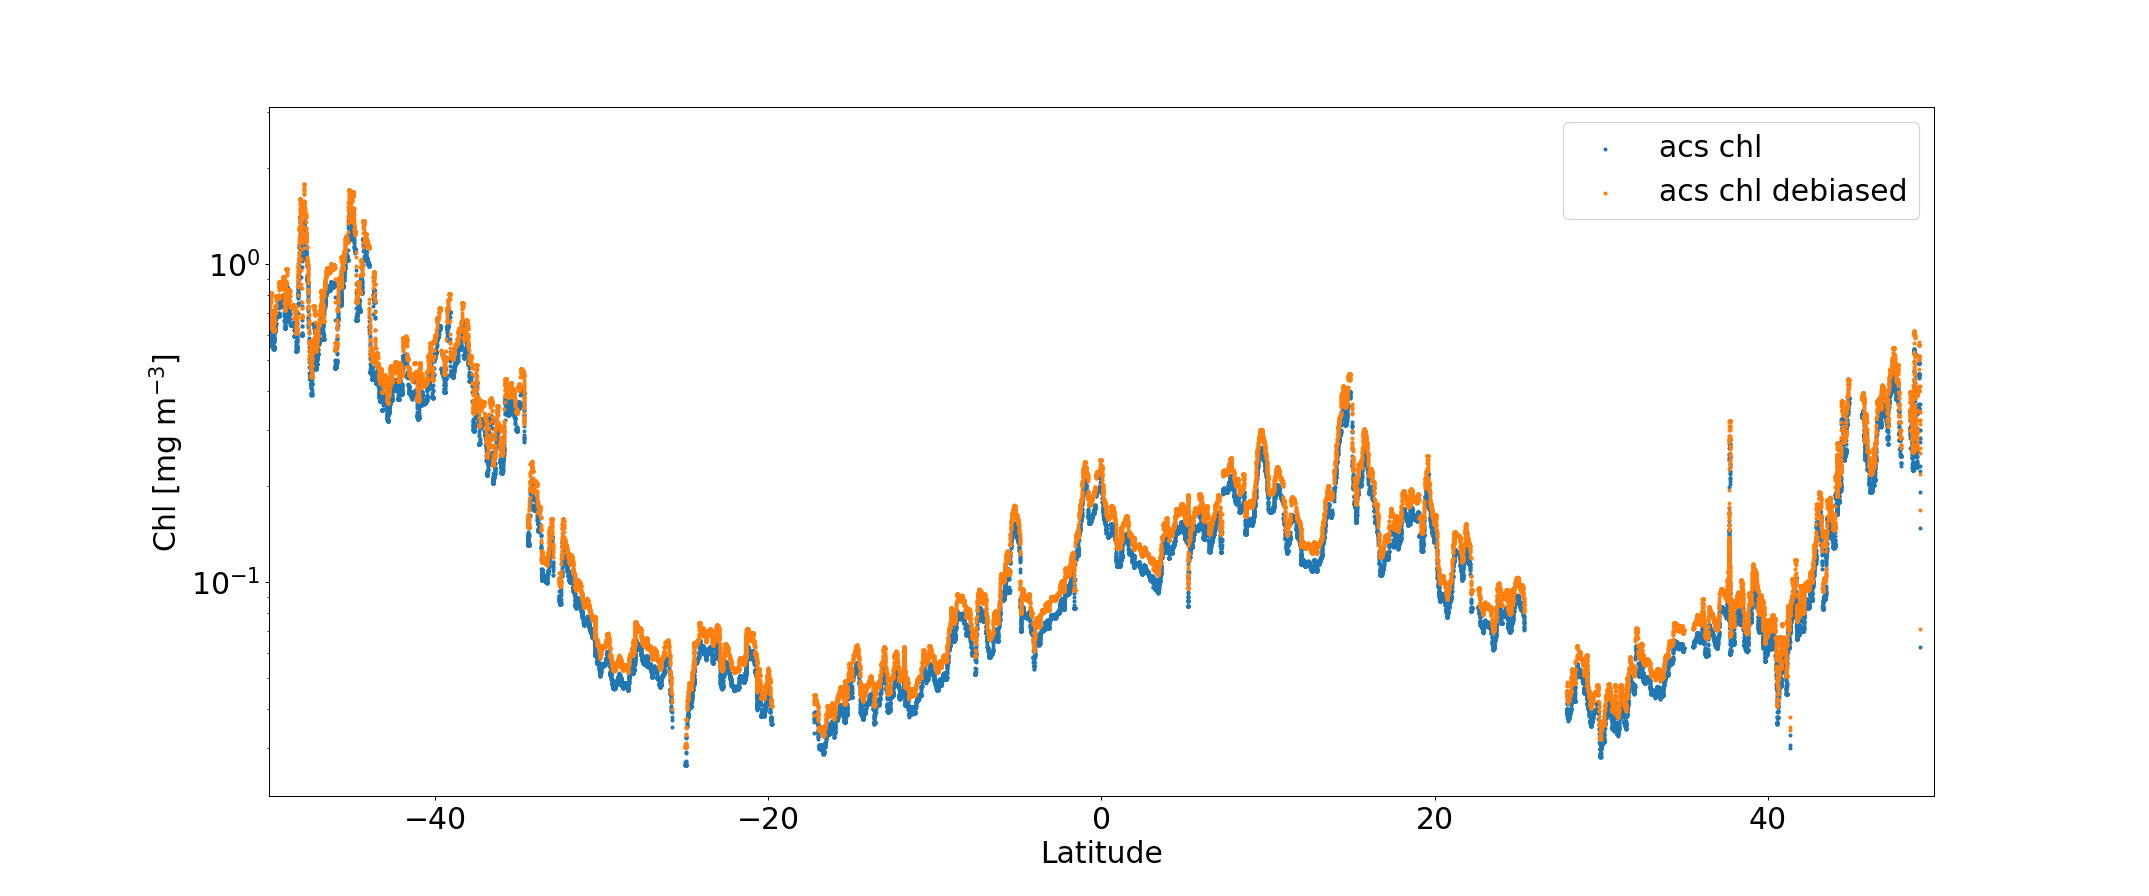

Text(0, 0.5, 'Chl [mg m$^{-3}$]')

In [76]:

# plot to show debiassing of chl
plt.figure(figsize=(24,10))
plt.rc('font', size=24)

plt.scatter(acs_filtered2['uway_lat'], acs_filtered2['acs_chl'], s=5,label='acs chl ')
plt.scatter(acs_filtered2['uway_lat'], acs_filtered2['acs_chl_debiased'], s=5,label='acs chl debiased')
plt.gca().set_yscale('log')
plt.legend()
plt.xlabel('Latitude')
plt.xlim(-50,50)
plt.ylabel('Chl [mg m$^{-3}$]')
    

<IPython.core.display.Javascript object>


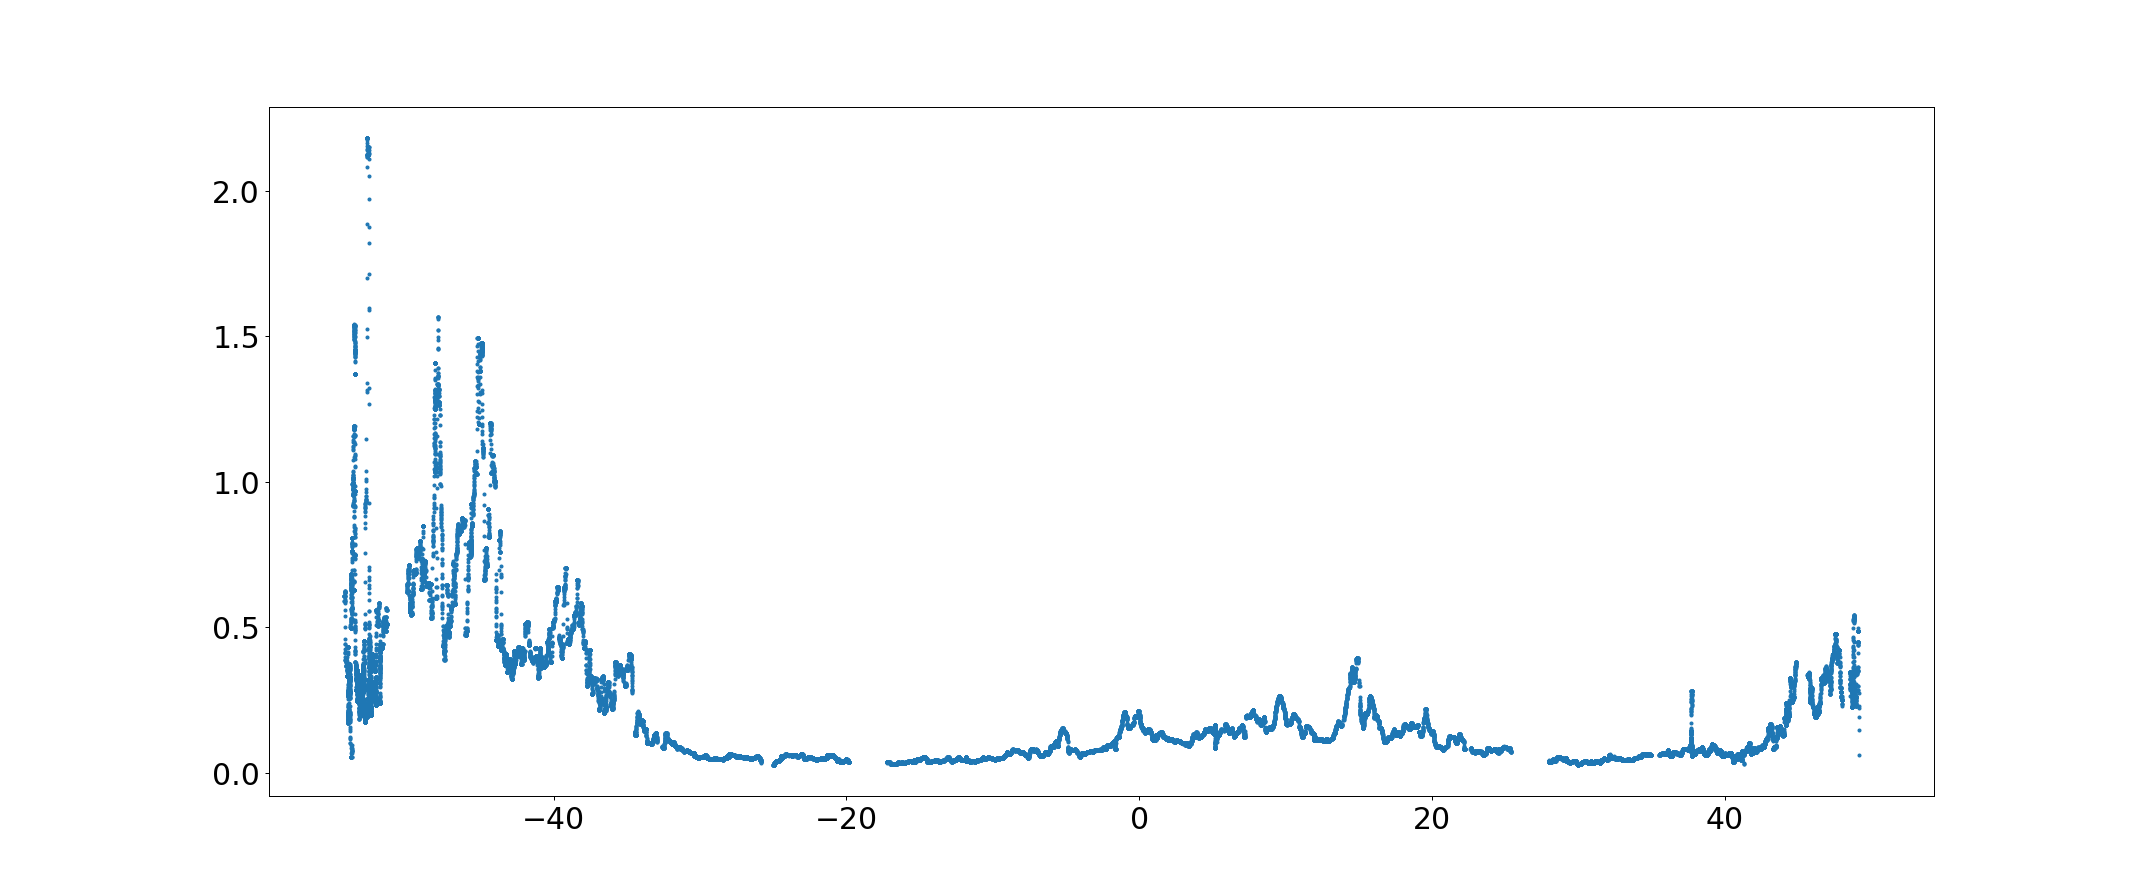

KeyError: 'ac9_chl'

In [77]:
# plot to show acs and ac9 chl separately
plt.figure(figsize=(24,10))
plt.rc('font', size=24)

plt.scatter(acs_filtered2['uway_lat'], acs_filtered2['acs_chl'], s=5,label='acs chl ')
plt.scatter(acs_filtered2['uway_lat'], acs_filtered2['ac9_chl'], s=5,label='ac9 chl')
plt.gca().set_yscale('log')
plt.legend()
plt.xlabel('Latitude')
plt.xlim(-50,50)
plt.ylabel('Chl [mg m$^{-3}$]')

In [ ]:
plt.i
plt.plot(acs_filtered2['acs_chl'])

plt.plot(acs_filtered2['ac9_chl'])

In [ ]:
list(acs_filtered2.keys())